In [1]:
# Import all of the required modules to run the notebook 

from pprint import pprint
import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u
from datetime import datetime

from sunpy.net import Fido, attrs as a
from sunpy.timeseries import TimeSeries

from stixpy.timeseries import quicklook # This registers the STIX timeseries with sunpy
from stixpy.net.client import STIXClient  # This registers the STIX client with Fido
from stixdcpy import auxiliary as aux
from stixpy.product import Product

In [5]:
# Use the stixdcpy package to access Solar Orbiter Emphemeris data which can be used to plot the spacecraft position 
# relative to the earth and the Sun.  

emph=aux.Ephemeris.from_sdc(start_utc='2020-02-10T00:00:00', end_utc='2025-04-15T01:00:00', steps=100)

An error occurred on the server.
An error occurred on the server.


Data not available. 


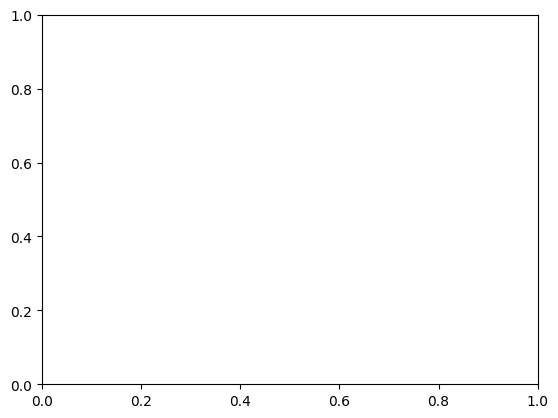

In [3]:
# Use the automatic plotting function to plot the relative positions of Solar Orbiter, the Sun and Earth. 
# This is in the Heliocentric Earth ecliptic reference frame which explains why the tracked position does not appear at
# all physical. 

emph.peek()

In [ ]:
# 1. See solution below. 

An error occurred on the server.
An error occurred on the server.
Data not available. 


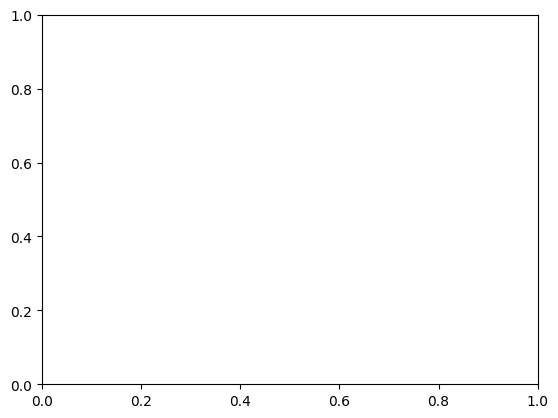

In [6]:
emph=aux.Ephemeris.from_sdc(start_utc='2024-03-19T20:00:00', end_utc='2024-03-19T23:00:00', steps=10)
emph.peek()


In [ ]:
emph=aux.Ephemeris.from_sdc(start_utc='2023-07-10T23:00:00', end_utc='2023-07-11T02:00:00', steps=10)
emph.peek()


In [7]:

ql_query = Fido.search(a.Time('2024-03-19T00:00:00', '2024-03-19T23:59:00',), a.Instrument.stix,
                    a.stix.DataProduct.ql_lightcurve)

ql_query

<sunpy.net.fido_factory.UnifiedResponse object at 0x2991233d0>
Results from 1 Provider:

1 Results from the STIXClient:

       Start Time               End Time        Instrument Level DataType  DataProduct  Ver Request ID
----------------------- ----------------------- ---------- ----- -------- ------------- --- ----------
2024-03-19 00:00:00.000 2024-03-19 23:59:59.999       STIX    L1       QL ql-lightcurve V02          -

In [8]:
ql_files = Fido.fetch(ql_query)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

(19801.965277777777, 19801.999305555557)

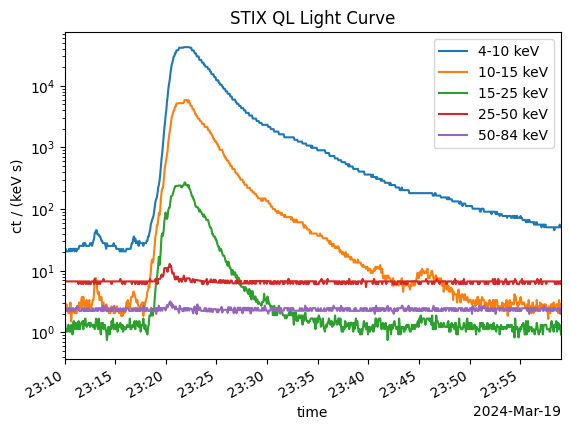

In [9]:
ql_lightcurves = TimeSeries(ql_files)
ql_lightcurves.plot()
plt.xlim(datetime(2024, 3, 19, 23, 10, 0), datetime(2024, 3, 19, 23, 59, 0))

In [10]:
# 2. See solution below.

In [11]:
ql_query = Fido.search(a.Time('2023-07-10T00:00:00', '2023-07-11T23:59:00',), a.Instrument.stix,
                    a.stix.DataProduct.ql_lightcurve)

ql_query


<sunpy.net.fido_factory.UnifiedResponse object at 0x29914b8e0>
Results from 1 Provider:

2 Results from the STIXClient:

       Start Time               End Time        Instrument Level DataType  DataProduct  Ver Request ID
----------------------- ----------------------- ---------- ----- -------- ------------- --- ----------
2023-07-10 00:00:00.000 2023-07-10 23:59:59.999       STIX    L1       QL ql-lightcurve V02          -
2023-07-11 00:00:00.000 2023-07-11 23:59:59.999       STIX    L1       QL ql-lightcurve V02          -

In [12]:
ql_files = Fido.fetch(ql_query)

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L1_stix-ql-lightcurve_20230710_V02.fits:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

solo_L1_stix-ql-lightcurve_20230711_V02.fits:   0%|          | 0.00/1.74M [00:00<?, ?B/s]

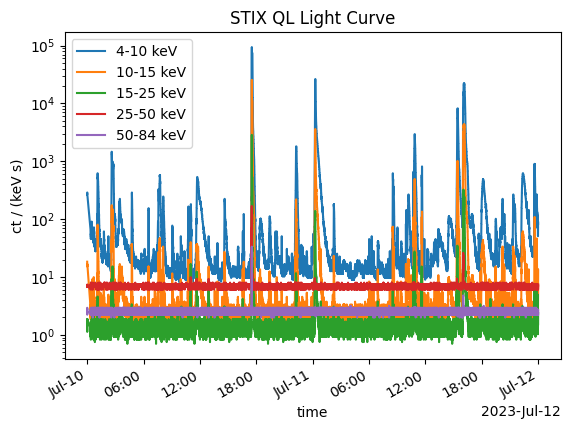

In [13]:
ql_lightcurves = TimeSeries(ql_files)

combined_ts = ql_lightcurves[0]
for lc in ql_lightcurves[1:]:
    combined_ts = combined_ts.concatenate(lc)

combined_ts.peek()

(19548.958333333332, 19549.083333333332)

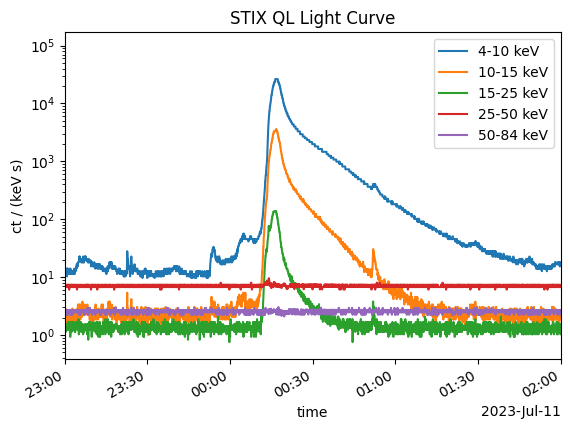

In [14]:
combined_ts.plot()
plt.xlim(datetime(2023, 7, 10, 23, 0, 0), datetime(2023, 7, 11, 2, 0, 0))

In [15]:
# 3. See solution below.

In [16]:
sci_query = Fido.search(a.Time('2023-07-10T23:00:00', '2023-07-11T02:00:00'), a.Instrument.stix, a.stix.DataType.sci)
sci_query

<sunpy.net.fido_factory.UnifiedResponse object at 0x299d09b20>
Results from 1 Provider:

10 Results from the STIXClient:

       Start Time               End Time        Instrument Level DataType  DataProduct  Ver Request ID
----------------------- ----------------------- ---------- ----- -------- ------------- --- ----------
2023-07-10 23:03:51.000 2023-07-10 23:14:40.000       STIX    L1      SCI  sci-xray-cpd V02 2307109062
2023-07-10 23:15:20.000 2023-07-10 23:19:13.000       STIX    L1      SCI  sci-xray-cpd V02 2307105005
2023-07-10 23:21:31.000 2023-07-10 23:25:26.000       STIX    L1      SCI  sci-xray-cpd V02 2307106260
2023-07-10 23:37:16.000 2023-07-10 23:42:51.000       STIX    L1      SCI  sci-xray-cpd V02 2307104826
2023-07-10 23:48:31.000 2023-07-11 02:06:51.000       STIX    L1      SCI  sci-xray-cpd V02 2307107569
2023-07-10 23:52:50.000 2023-07-10 23:56:34.000       STIX    L1      SCI  sci-xray-cpd V02 2307103500
2023-07-10 20:35:07.000 2023-07-11 02:40:06.000       STIX    L1      SCI sci-xray-spec V02 2307101059
2023-07-11 00:08:13.000 2023-07-11 00:19:51.000       STIX    L1      SCI  sci-xray-cpd V02 2307118817
2023-07-11 01:47:40.000 2023-07-11 01:50:09.000       STIX    L1      SCI  sci-xray-cpd V02 2307119818
2023-07-11 01:57:45.000 2023-07-11 02:02:03.000       STIX    L1      SCI  sci-xray-cpd V02 2307111965

In [17]:
sci_query[0][[4]]

<sunpy.net.dataretriever.client.QueryResponse object at 0x2989d4040>
       Start Time               End Time        Instrument Level DataType DataProduct  Ver Request ID
----------------------- ----------------------- ---------- ----- -------- ------------ --- ----------
2023-07-10 23:48:31.000 2023-07-11 02:06:51.000       STIX    L1      SCI sci-xray-cpd V02 2307107569

In [18]:
sci_files = Fido.fetch(sci_query[0][[4]])

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230710T234831-20230711T020651_V02_2307107569-63625.fits:   0%|          | 0.00/4.5…

In [19]:
spec = Product(sci_files[0])
spec

CompressedPixelData   <sunpy.time.timerange.TimeRange object at 0x2990ede20>
    Start: 2023-07-10 23:48:31
    End:   2023-07-11 02:06:51
    Center:2023-07-11 00:57:41
    Duration:0.09606828703703718 days or
           2.3056388888888923 hours or
           138.33833333333354 minutes or
           8300.300000000012 seconds
    DetectorMasks
    [0...131]: [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

    PixelMasks
    [0...131]: [['1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0']]

    EnergyEdgeMasks
    [0]: [_,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,_,_,_,_,_,_,_,_,_]

In [20]:
# 4. See solution below. 

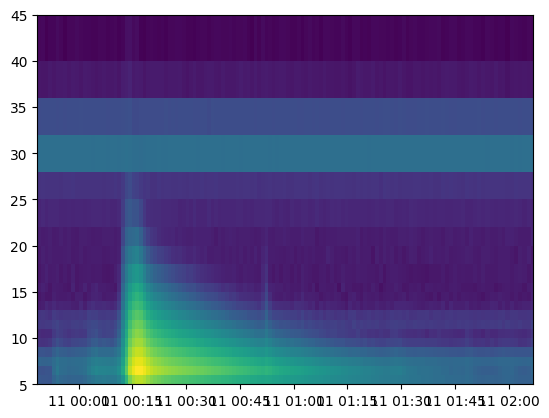

In [21]:
spec.plot_spectrogram()

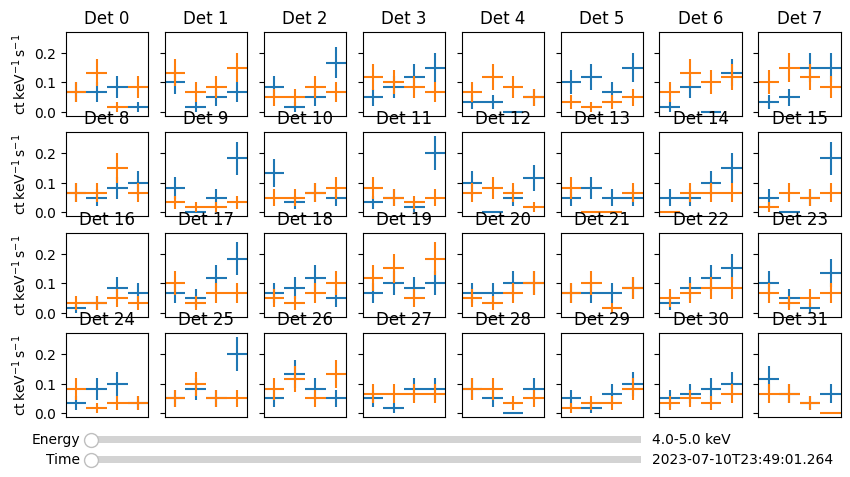

In [22]:
spec.plot_pixels()

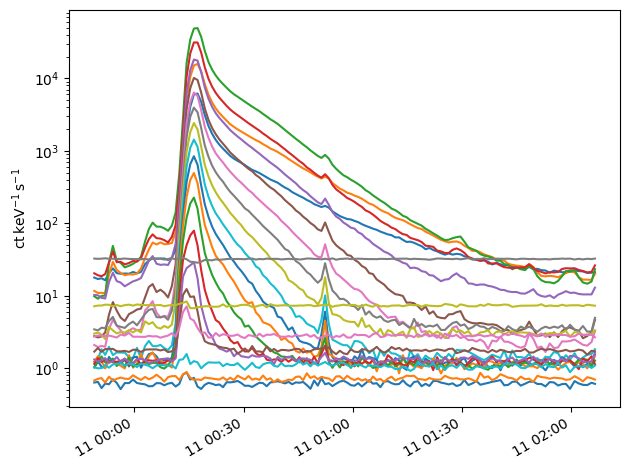

In [23]:
spec.plot_timeseries()

In [24]:
counts_sci_full, errors_sci_full, times_sci_full, deltatimes_sci_full, energies_sci_full = spec.get_data()

energies_sci_full


<QTable length=22>
channel  e_low   e_high
          keV     keV  
 uint8  float32 float32
------- ------- -------
      0     4.0     5.0
      1     5.0     6.0
      2     6.0     7.0
      3     7.0     8.0
      4     8.0     9.0
      5     9.0    10.0
      6    10.0    11.0
      7    11.0    12.0
      8    12.0    13.0
      9    13.0    14.0
     10    14.0    15.0
     11    15.0    16.0
     12    16.0    18.0
     13    18.0    20.0
     14    20.0    22.0
     15    22.0    25.0
     16    25.0    28.0
     17    28.0    32.0
     18    32.0    36.0
     19    36.0    40.0
     20    40.0    45.0
     21    45.0    50.0

In [25]:
# 5. See solution below.

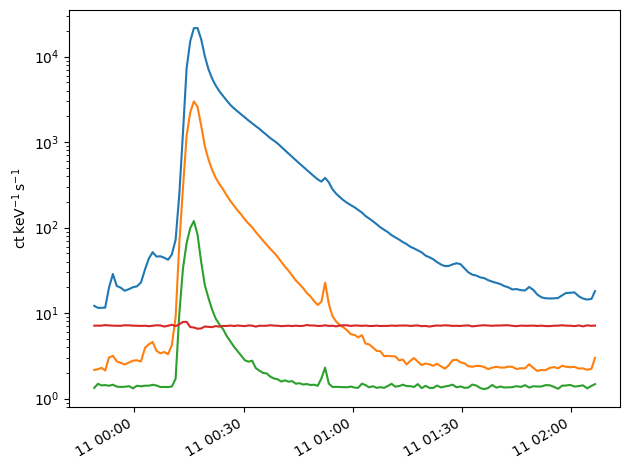

In [26]:
spec.plot_timeseries(energy_indices=[[0, 5],[6, 10],[11, 15],[16,21]])

In [28]:
counts_sci, errors_sci, times_sci, deltatimes_sci, energies_sci = spec.get_data(pixel_indices=[[0,7]],
                                                                                time_indices=[[0,len(times_sci_full)-1]],
                                                                                detector_indices=[[0,22]])

counts_sci = counts_sci[0][0][0]
errors_sci = errors_sci[0][0][0]

In [29]:
counts_sci

<Quantity [2.47248654e+02, 6.34968375e+02, 1.80956435e+03, 1.07588111e+03,
           5.89935785e+02, 3.10218667e+02, 1.81005265e+02, 1.06209655e+02,
           6.21132971e+01, 3.50709011e+01, 2.01799935e+01, 1.17529487e+01,
           5.83069287e+00, 2.63785646e+00, 1.59668928e+00, 1.50552791e+00,
           2.10510463e+00, 2.34126779e+01, 5.33435538e+00, 7.91778610e-01,
           4.46658555e-01, 5.24125634e-01] ct / (keV s)>

(3.5, 52)

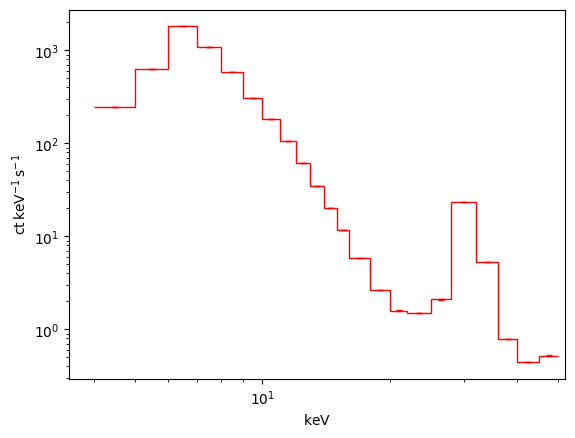

In [30]:
energy_edges = np.concatenate([energies_sci['e_low'].value,[energies_sci['e_high'][-1].value]])*u.keV
energy_centers = energies_sci['e_low'] + 0.5*np.diff(energy_edges)


plt.figure()
plt.loglog()
plt.errorbar(energy_centers,counts_sci,yerr=errors_sci,marker=None,capsize=2,linestyle='', color='red')
plt.stairs(counts_sci,energy_edges,baseline=None, color='red')
plt.xlim([3.5,52])

In [31]:
bkg_query = Fido.search(a.Time('2023-07-06T20:00:00', '2023-07-06T22:00:00'), a.Instrument.stix, a.stix.DataType.sci)
bkg_query


<sunpy.net.fido_factory.UnifiedResponse object at 0x29e0f6ee0>
Results from 1 Provider:

3 Results from the STIXClient:

       Start Time               End Time        Instrument Level DataType  DataProduct  Ver Request ID
----------------------- ----------------------- ---------- ----- -------- ------------- --- ----------
2023-07-06 21:00:04.000 2023-07-06 21:50:04.000       STIX    L1      SCI  sci-xray-cpd V02 2307067331
2023-07-06 14:30:19.000 2023-07-06 20:35:04.000       STIX    L1      SCI sci-xray-spec V02 2307066202
2023-07-06 20:30:04.000 2023-07-07 02:35:13.000       STIX    L1      SCI sci-xray-spec V02 2307060501

In [32]:
bkg_files = Fido.fetch(bkg_query[0][[0]])

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20230706T210004-20230706T215004_V02_2307067331-59092.fits:   0%|          | 0.00/124…

In [33]:
bkg = Product(bkg_files[0])
bkg

CompressedPixelData   <sunpy.time.timerange.TimeRange object at 0x29e1734c0>
    Start: 2023-07-06 21:00:04
    End:   2023-07-06 21:50:04
    Center:2023-07-06 21:25:04
    Duration:0.03472222222222232 days or
           0.8333333333333357 hours or
           50.00000000000014 minutes or
           3000.0000000000086 seconds
    DetectorMasks
    [0]: [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

    PixelMasks
    [0]: [['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']]

    EnergyEdgeMasks
    [0]: [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]

In [34]:
# 6. See solution below. 

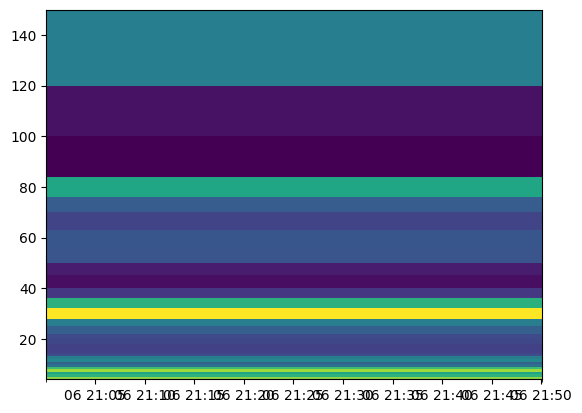

In [35]:
bkg.plot_spectrogram()


In [36]:
# 7. See solution below. 

In [37]:
counts_bkg_full, errors_bkg_full, times_bkg_full, deltatimes_bkg_full, energies_bkg_full = bkg.get_data()

In [38]:
# 8. See solution below. 

In [39]:
counts_bkg, errors_bkg, times_bkg, deltatimes_bkg, energies_bkg = bkg.get_data(pixel_indices=[[0,7]],
                                                                                time_indices=[[0,len(times_bkg_full)-1]],
                                                                                detector_indices=[[0,22]],
                                                                                energy_indices=np.arange(1,len(energies_sci)+1,1))

counts_bkg= counts_bkg[0][0][0]
errors_bkg= errors_bkg[0][0][0]

energies_bkg

<QTable length=22>
channel  e_low   e_high
          keV     keV  
 uint8  float32 float32
------- ------- -------
      1     4.0     5.0
      2     5.0     6.0
      3     6.0     7.0
      4     7.0     8.0
      5     8.0     9.0
      6     9.0    10.0
      7    10.0    11.0
      8    11.0    12.0
      9    12.0    13.0
     10    13.0    14.0
     11    14.0    15.0
     12    15.0    16.0
     13    16.0    18.0
     14    18.0    20.0
     15    20.0    22.0
     16    22.0    25.0
     17    25.0    28.0
     18    28.0    32.0
     19    32.0    36.0
     20    36.0    40.0
     21    40.0    45.0
     22    45.0    50.0

In [40]:
# 9. See solution below.

(3.5, 52)

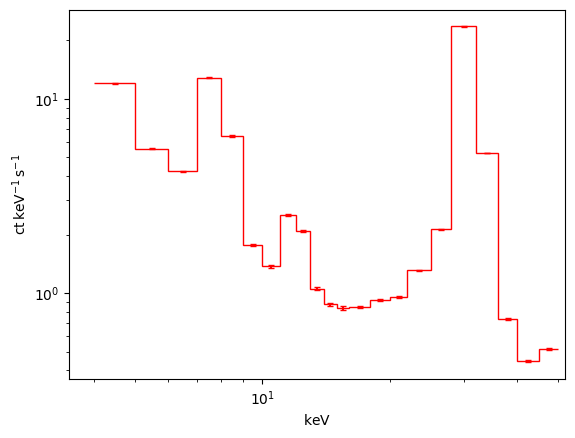

In [41]:
energy_edges = np.concatenate([energies_bkg['e_low'].value,[energies_bkg['e_high'][-1].value]])*u.keV
energy_centers = energies_bkg['e_low'] + 0.5*np.diff(energy_edges)

plt.figure()
plt.loglog()
plt.errorbar(energy_centers,counts_bkg,yerr=errors_bkg,marker=None,capsize=2,linestyle='', color='red')
plt.stairs(counts_bkg,energy_edges,baseline=None, color='red')
plt.xlim([3.5,52])

In [42]:
# 10. See solution below. 

[ 2.35211987e+02  6.29433041e+02  1.80533135e+03  1.06307311e+03
  5.83494452e+02  3.08448000e+02  1.79631932e+02  1.03674988e+02
  6.00302971e+01  3.40175677e+01  1.93026602e+01  1.09149487e+01
  4.98235953e+00  1.71768980e+00  6.40689276e-01  1.96305690e-01
 -2.52286986e-02 -1.45322145e-01  6.70220514e-02  5.21952771e-02
  5.25221177e-04  8.12563401e-03] ct / (keV s)


[]

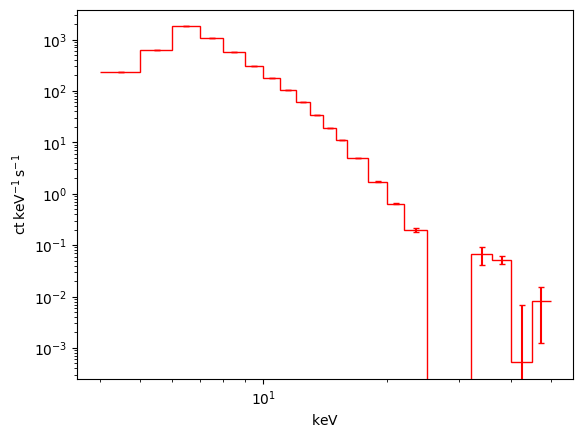

In [43]:
counts_bkg_subtracted = counts_sci - counts_bkg
errors_bkg_subtracted = np.sqrt(errors_bkg**2 + errors_sci**2)

print(counts_bkg_subtracted)

plt.figure()
plt.errorbar(energy_centers,counts_bkg_subtracted,yerr=errors_bkg_subtracted,marker=None,capsize=2,linestyle='', color='red')
plt.stairs(counts_bkg_subtracted,energy_edges,baseline=None, color='red')
plt.loglog()

In [44]:
# 11. See solution below. This is just one way of achieving this, so if you have similar results using a  slightly 
#  different method thats fine. 

In [45]:
# Take a look at the times for the full science file 
times_sci_full

<Time object: scale='utc' format='isot' value=['2023-07-10T23:49:01.264' '2023-07-10T23:50:01.264'
 '2023-07-10T23:51:01.264' '2023-07-10T23:52:01.264'
 '2023-07-10T23:53:03.614' '2023-07-10T23:54:08.214'
 '2023-07-10T23:55:11.814' '2023-07-10T23:56:15.914'
 '2023-07-10T23:57:24.264' '2023-07-10T23:58:33.764'
 '2023-07-10T23:59:39.964' '2023-07-11T00:00:44.114'
 '2023-07-11T00:01:50.764' '2023-07-11T00:02:57.814'
 '2023-07-11T00:04:00.864' '2023-07-11T00:05:02.964'
 '2023-07-11T00:06:06.714' '2023-07-11T00:07:11.364'
 '2023-07-11T00:08:14.264' '2023-07-11T00:09:16.914'
 '2023-07-11T00:10:19.814' '2023-07-11T00:11:21.414'
 '2023-07-11T00:12:22.414' '2023-07-11T00:13:22.564'
 '2023-07-11T00:14:22.564' '2023-07-11T00:15:22.564'
 '2023-07-11T00:16:22.564' '2023-07-11T00:17:22.564'
 '2023-07-11T00:18:22.564' '2023-07-11T00:19:22.564'
 '2023-07-11T00:20:22.564' '2023-07-11T00:21:22.564'
 '2023-07-11T00:22:22.564' '2023-07-11T00:23:22.564'
 '2023-07-11T00:24:22.564' '2023-07-11T00:25:22.564'


In [46]:
# retrieve the data for each time bin

counts_sci_bins, errors_sci_bins, times_sci_bins, deltatimes_sci_bins, energies_sci_bins = spec.get_data(pixel_indices=[[0,7]],
                                                                                detector_indices=[[0,22]])

# Check shape to see number of time steps
np.shape(counts_sci_bins)


(132, 1, 1, 22)

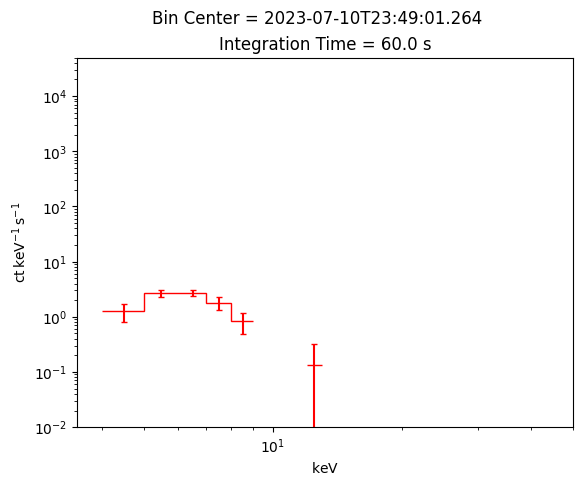

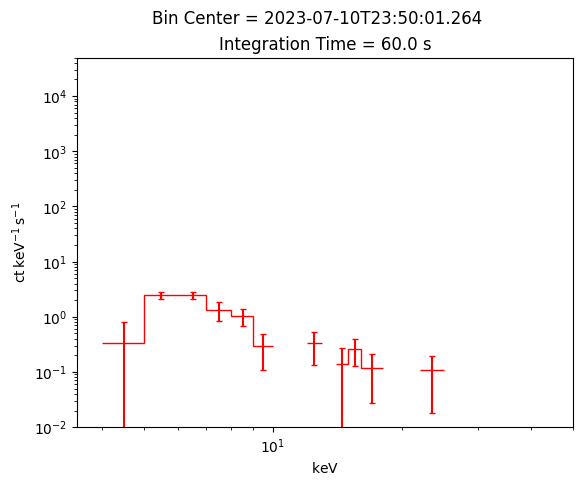

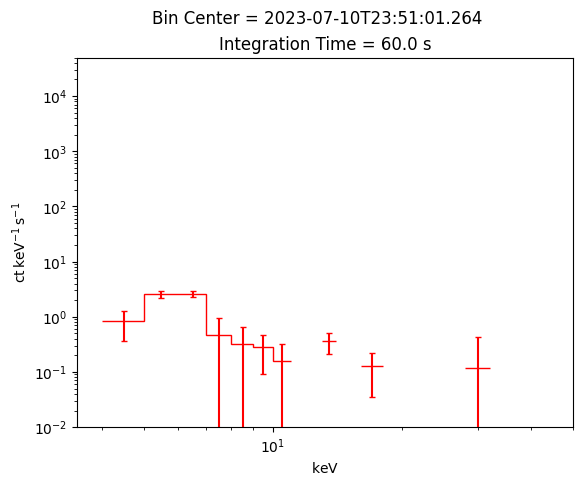

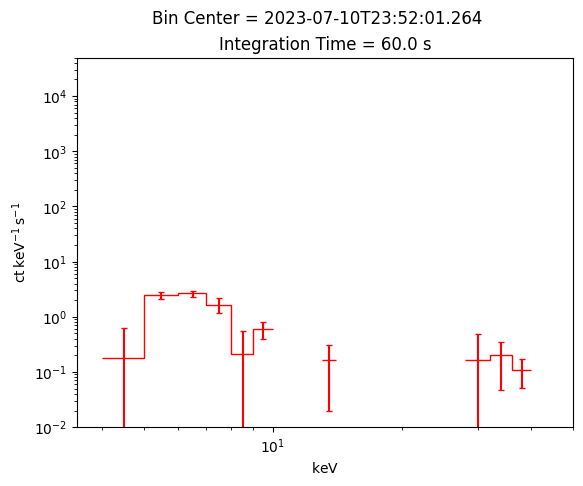

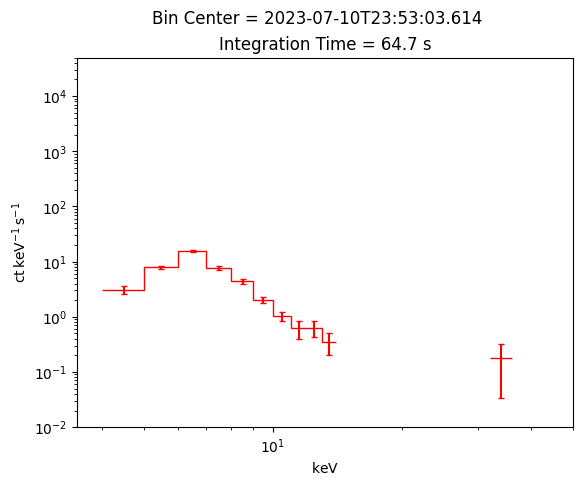

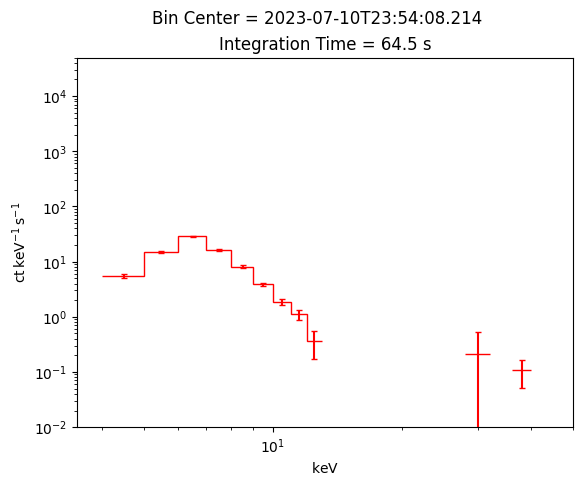

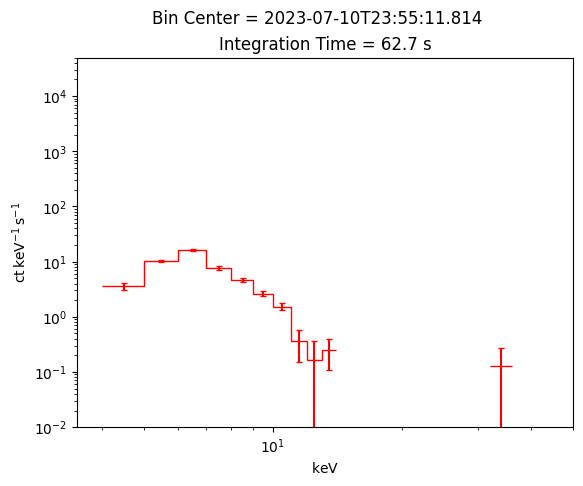

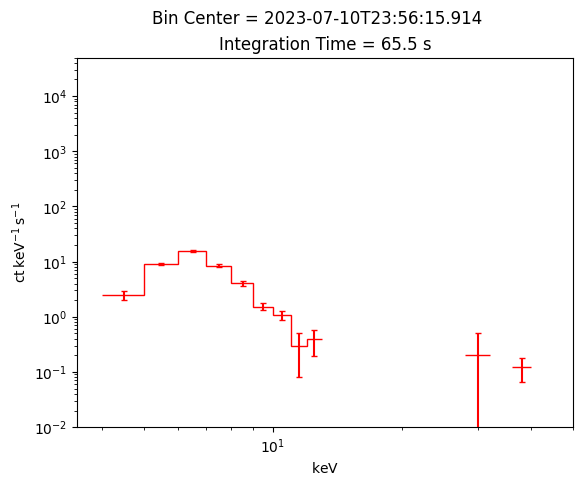

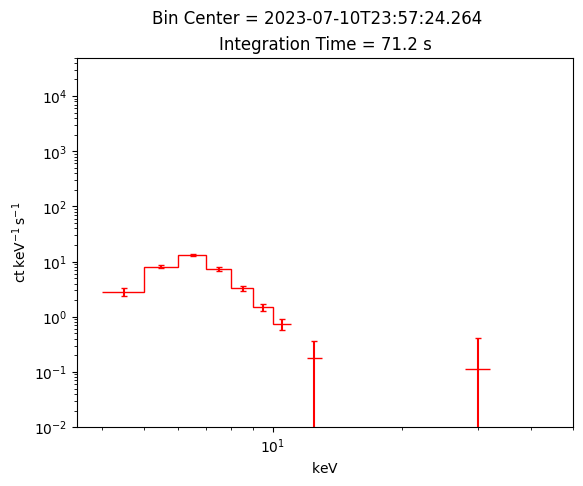

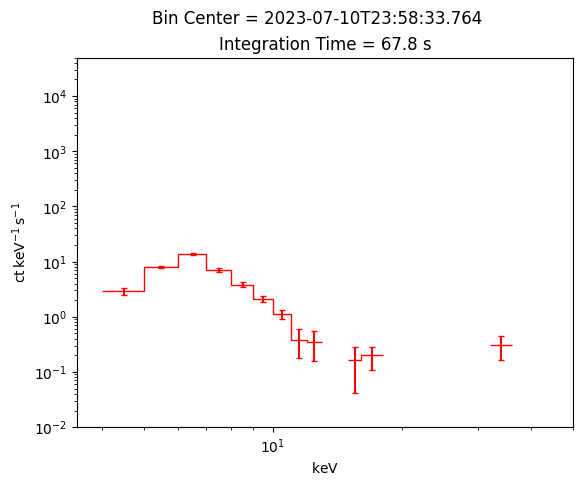

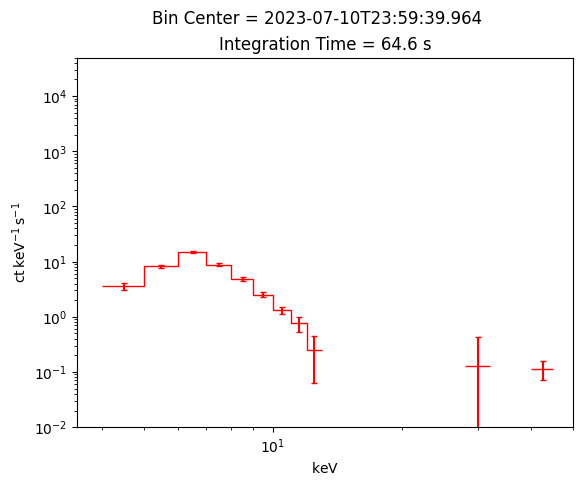

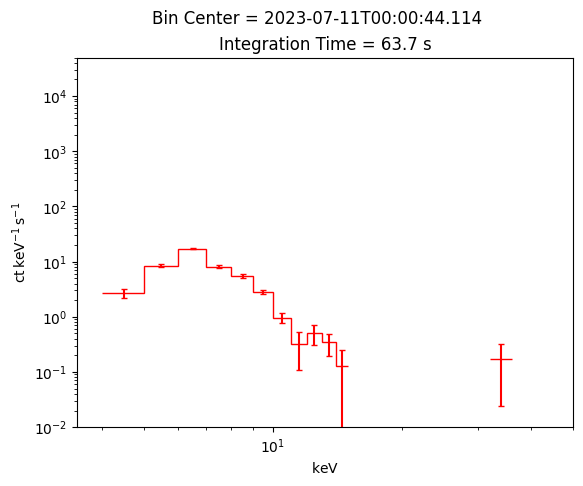

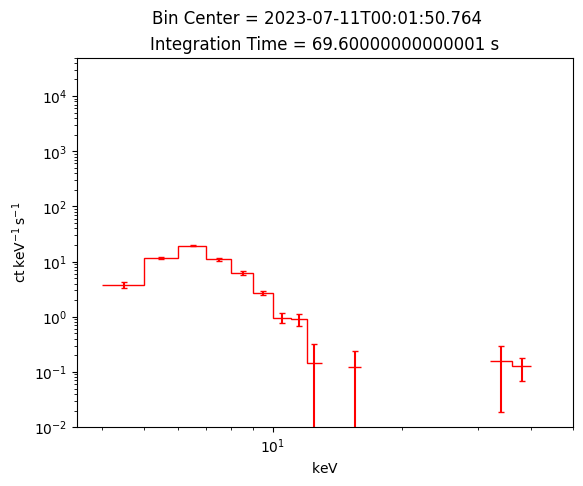

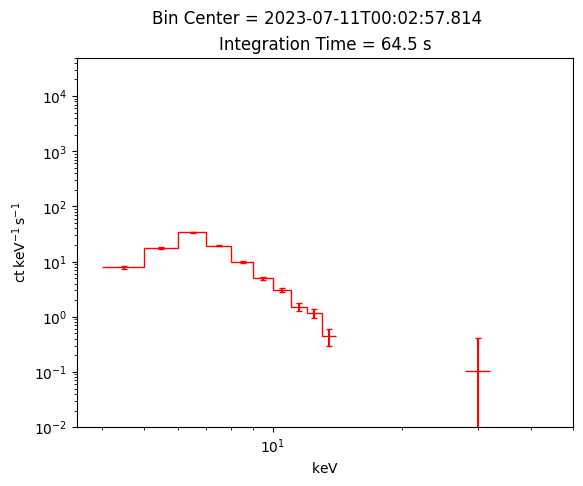

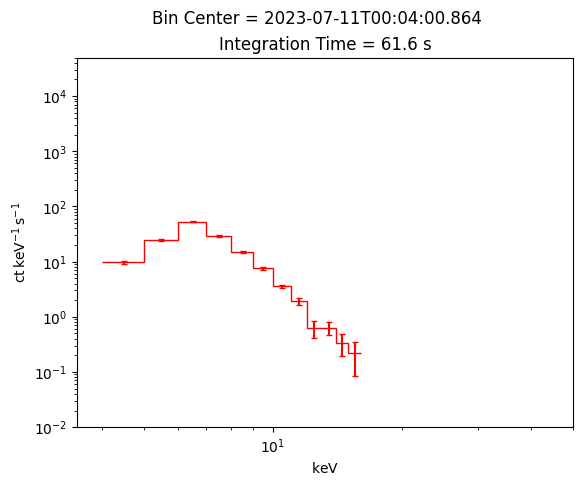

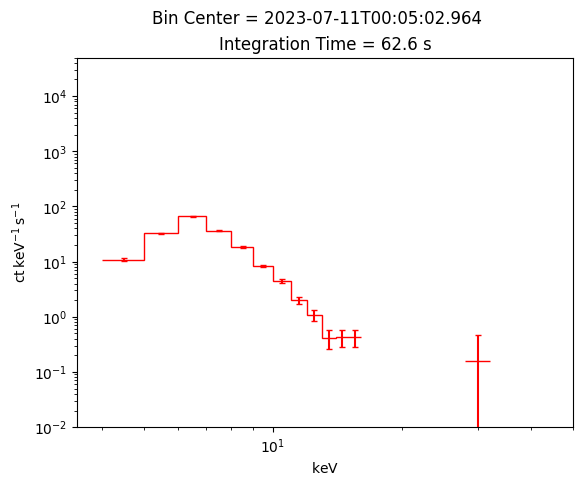

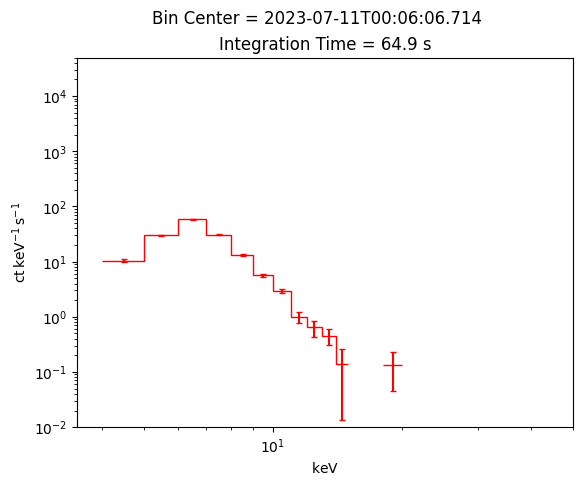

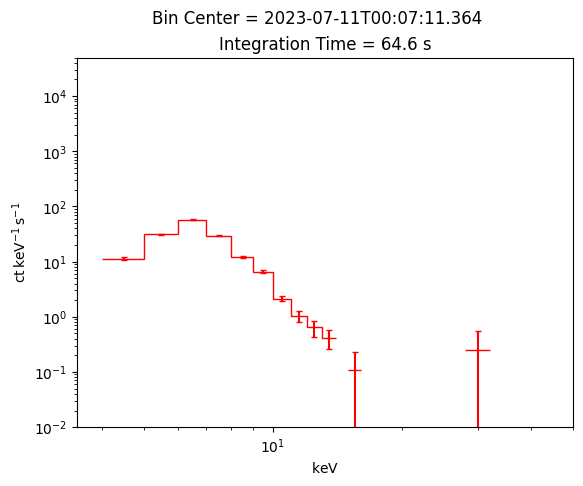

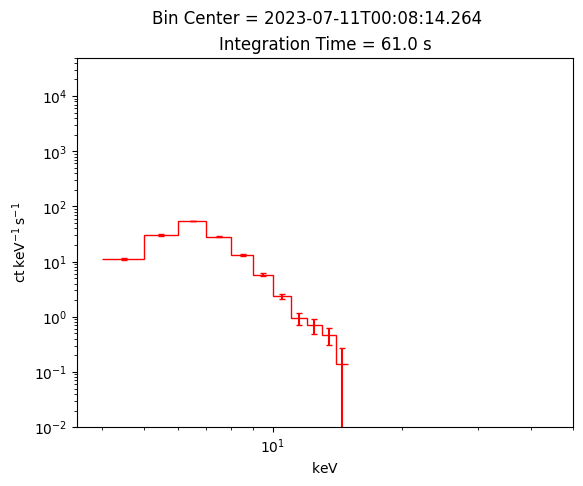

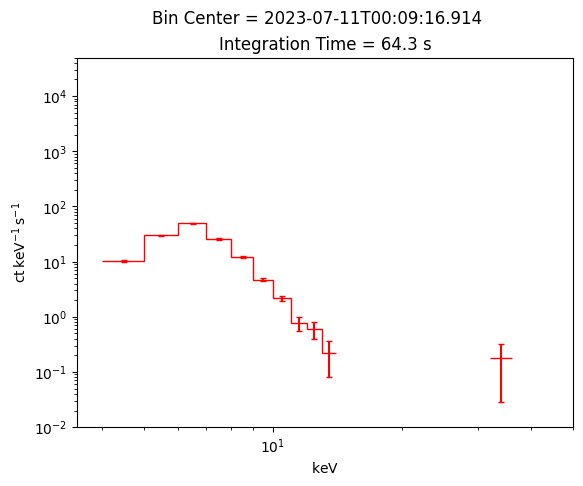

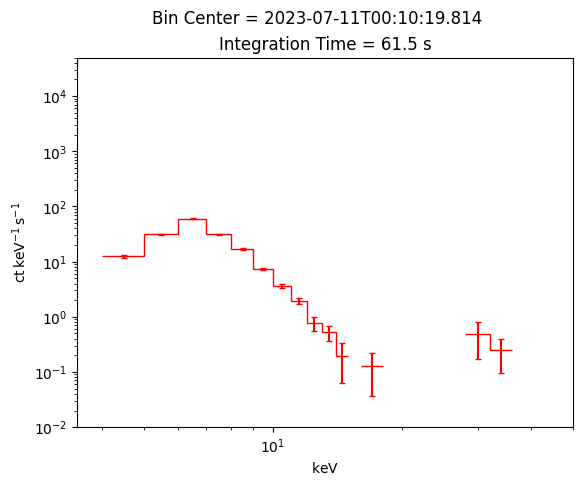

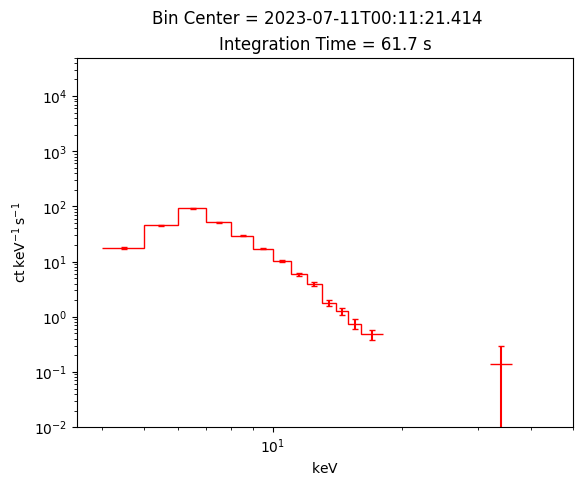

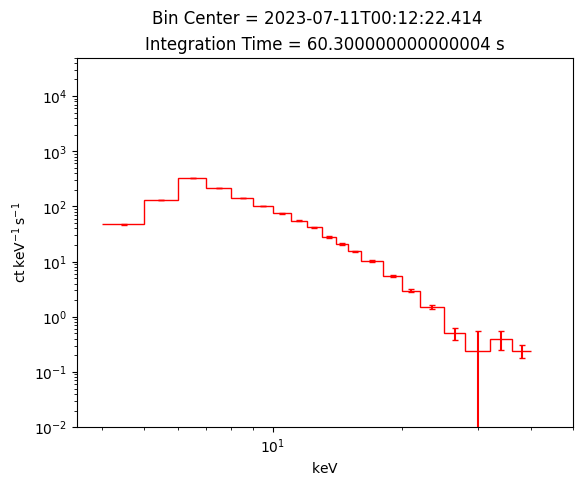

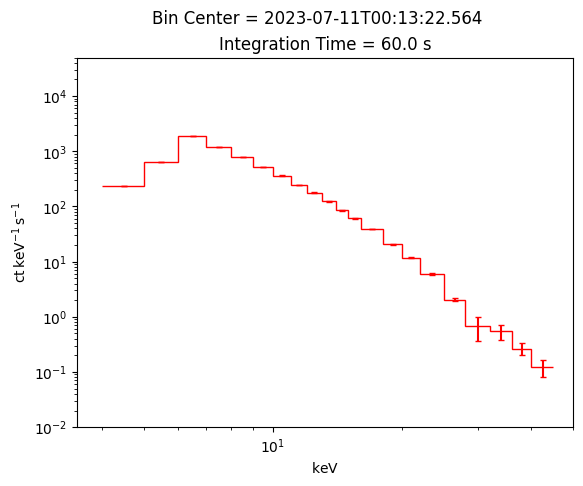

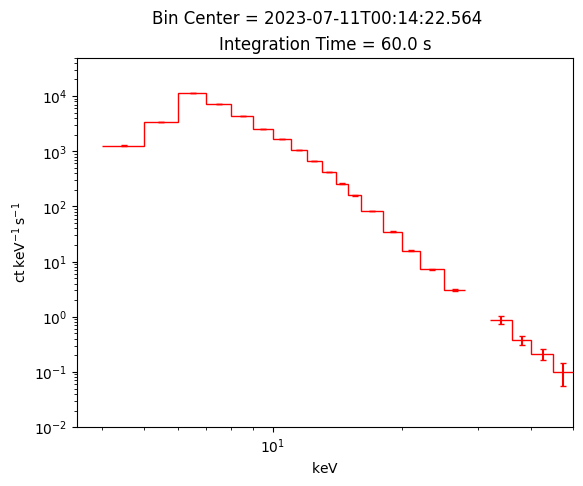

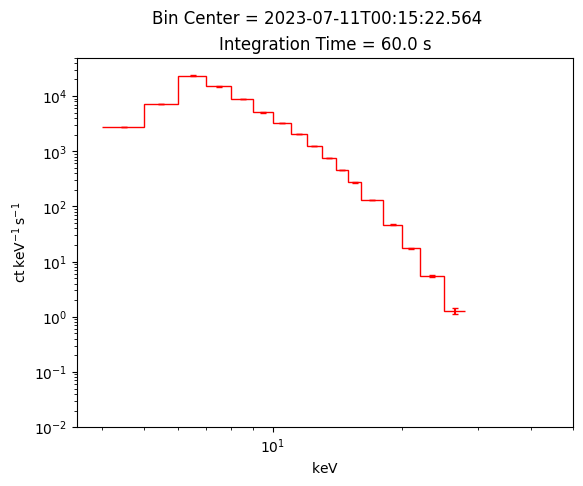

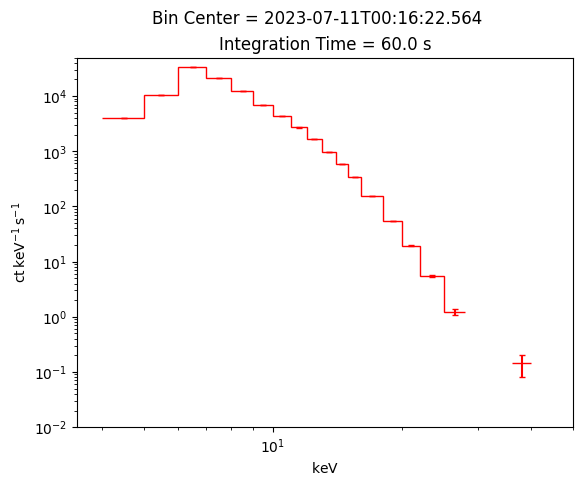

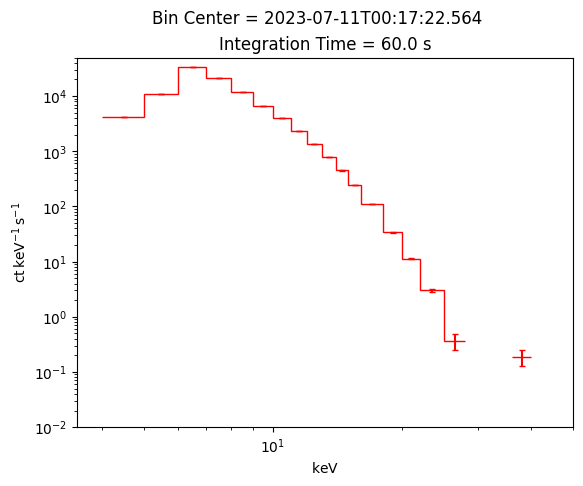

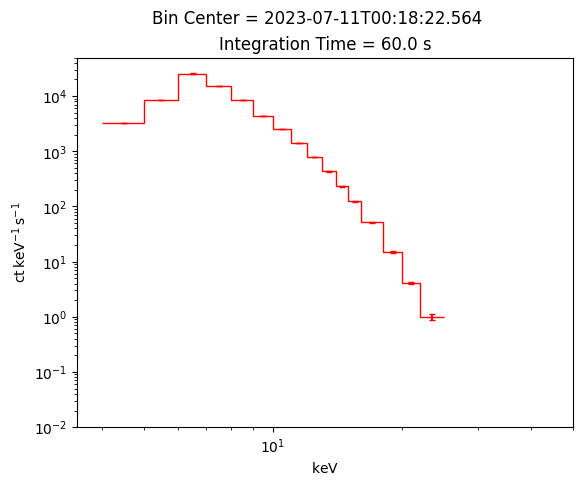

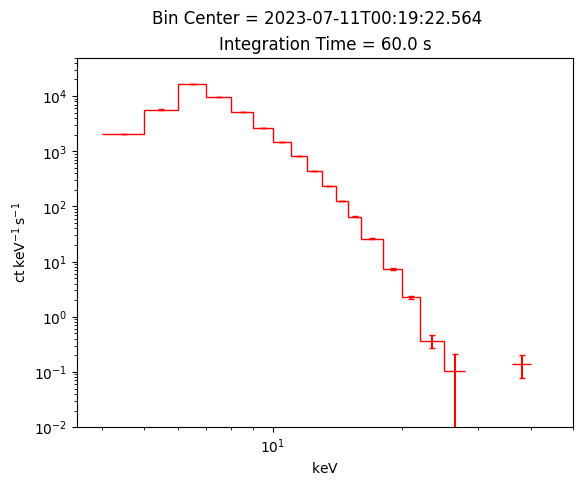

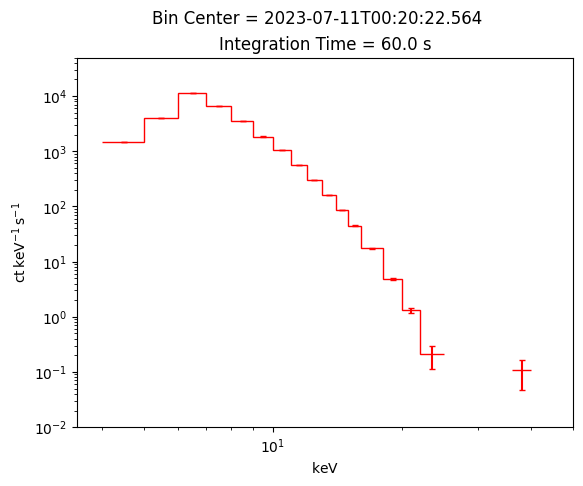

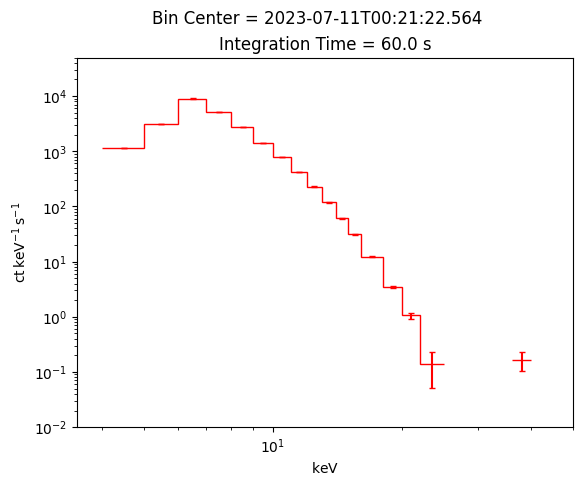

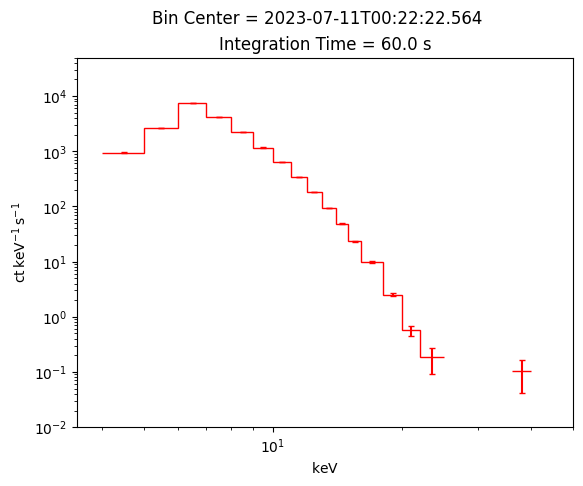

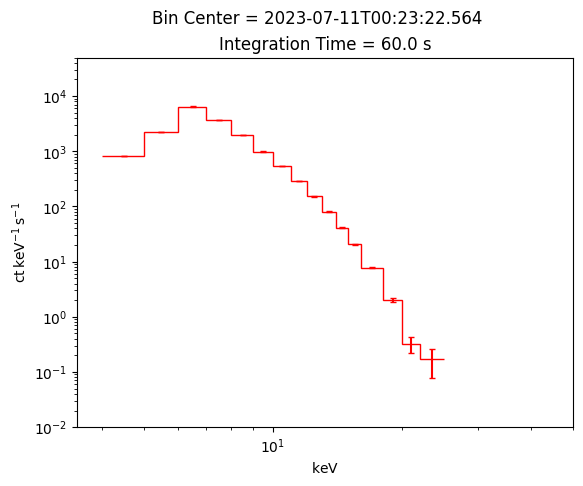

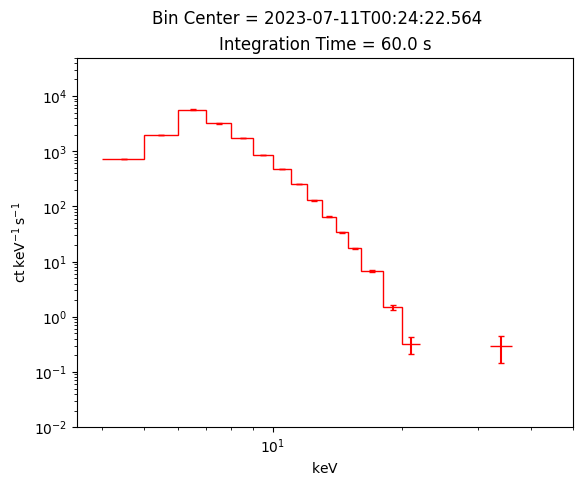

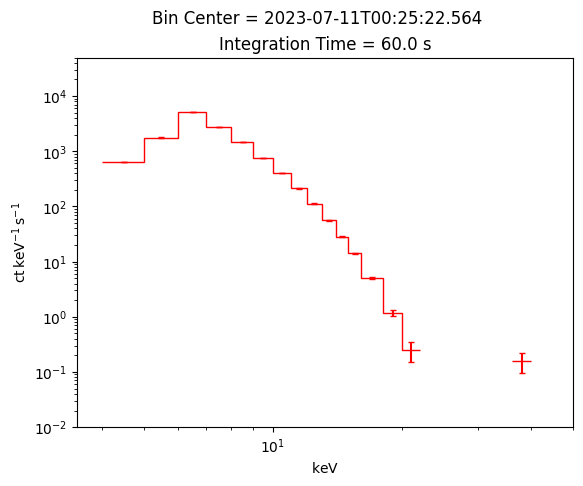

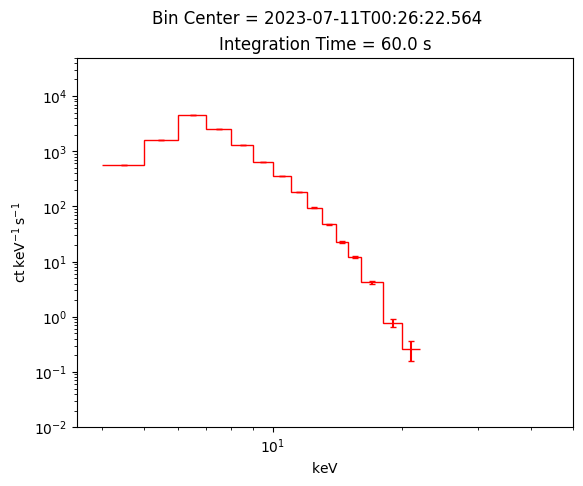

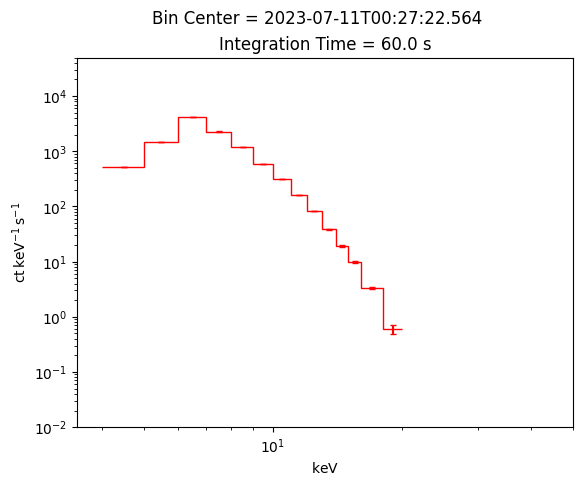

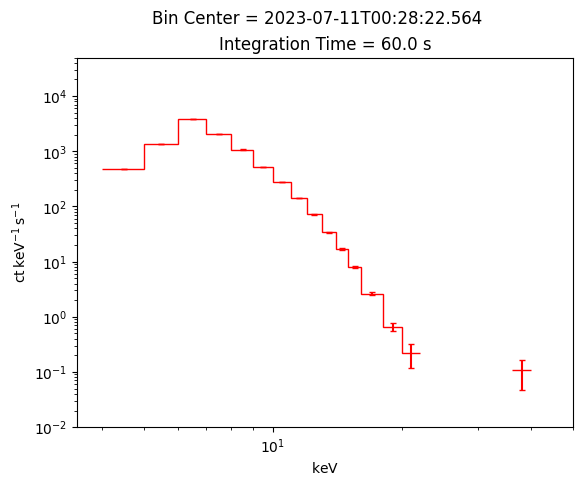

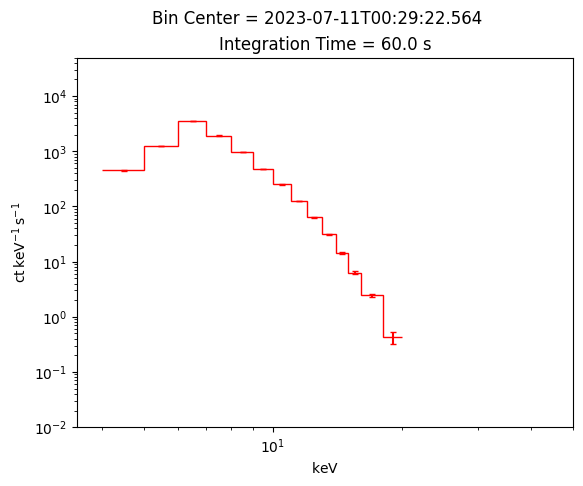

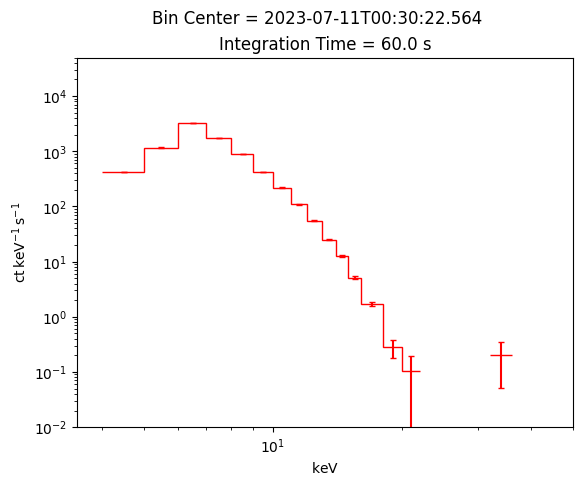

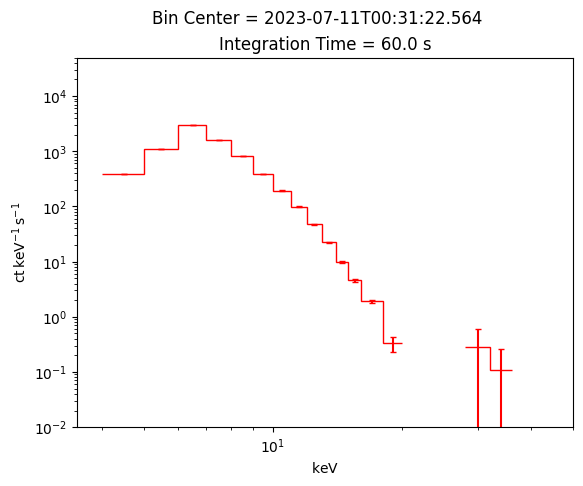

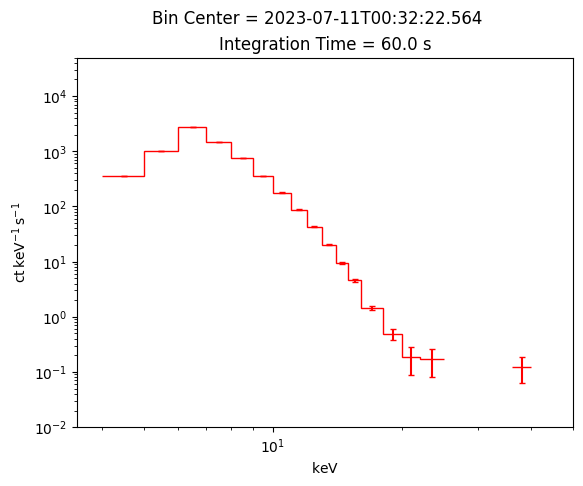

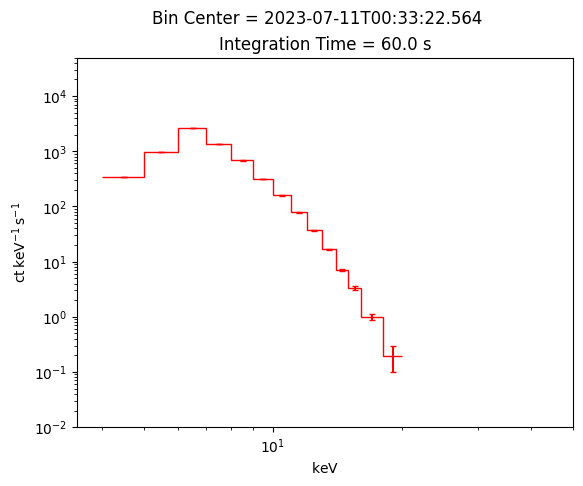

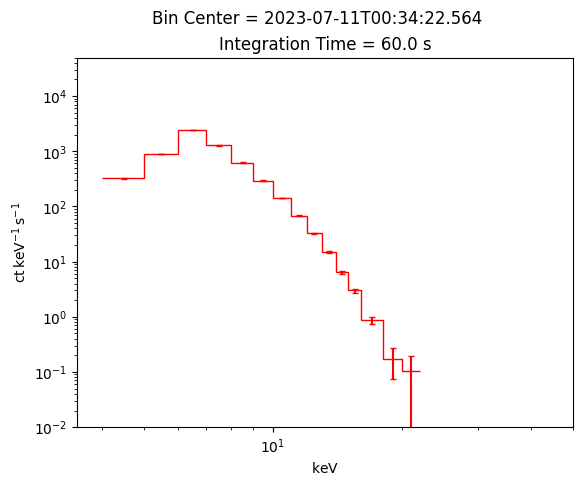

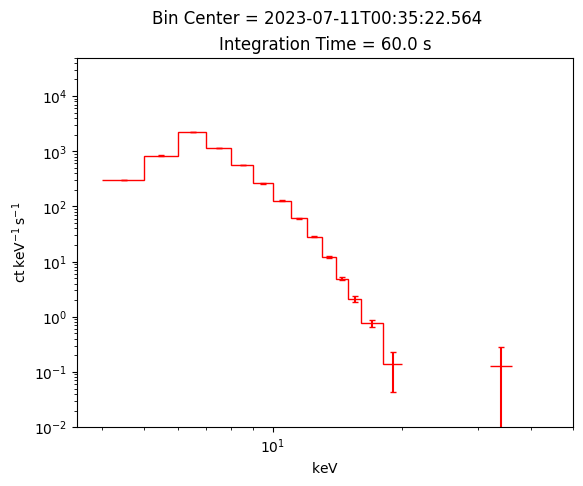

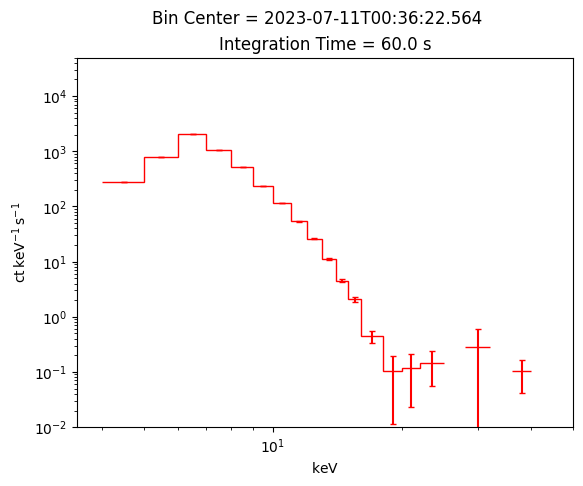

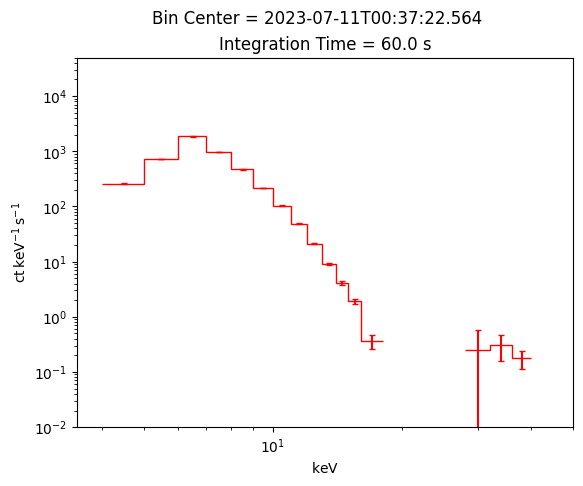

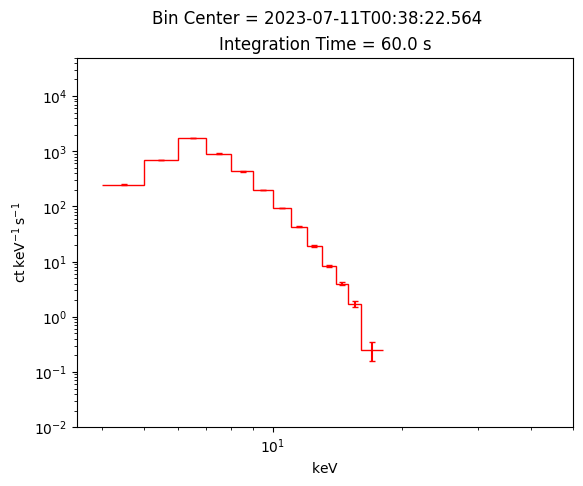

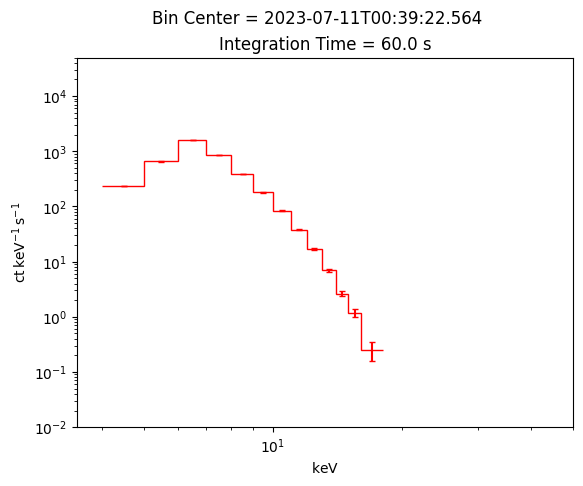

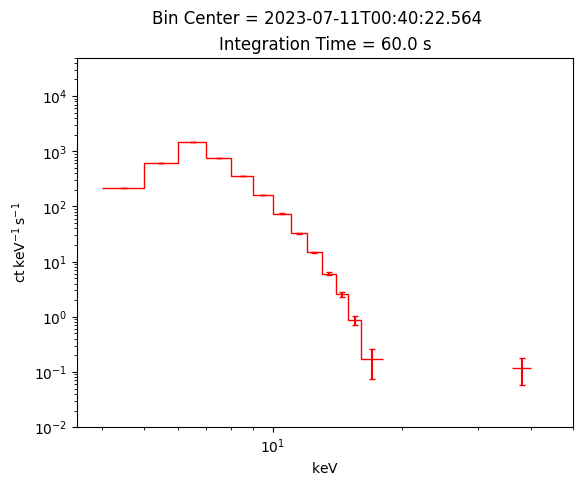

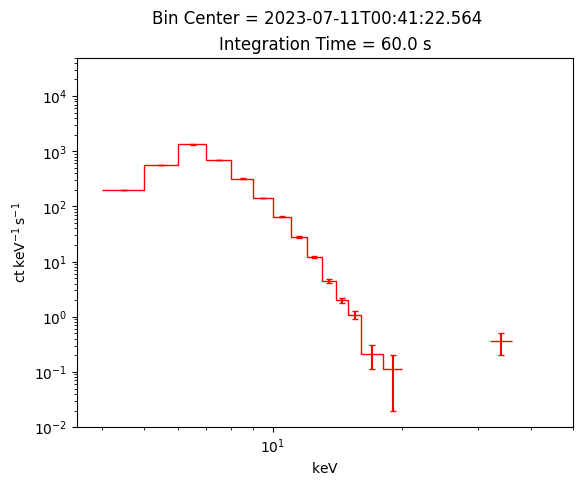

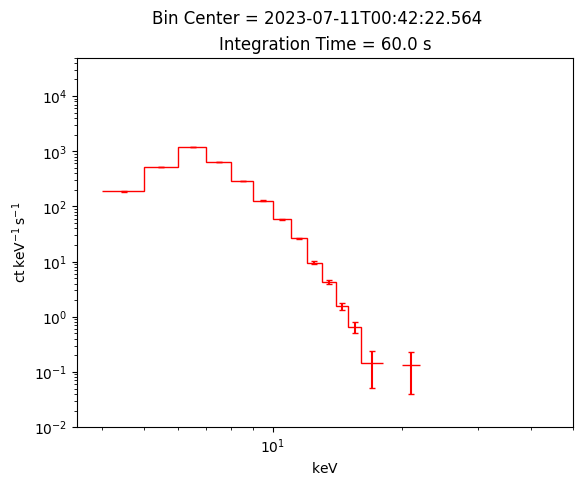

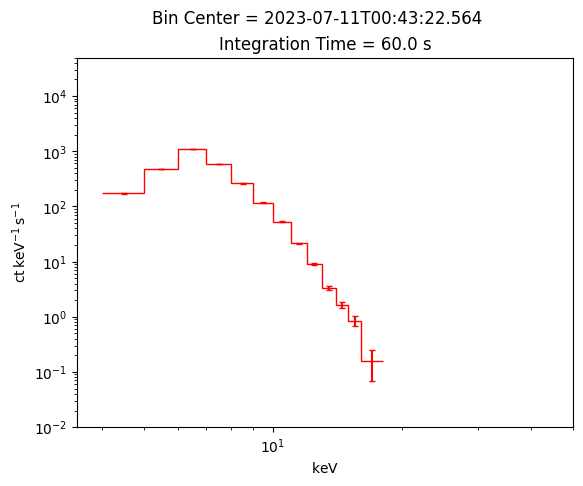

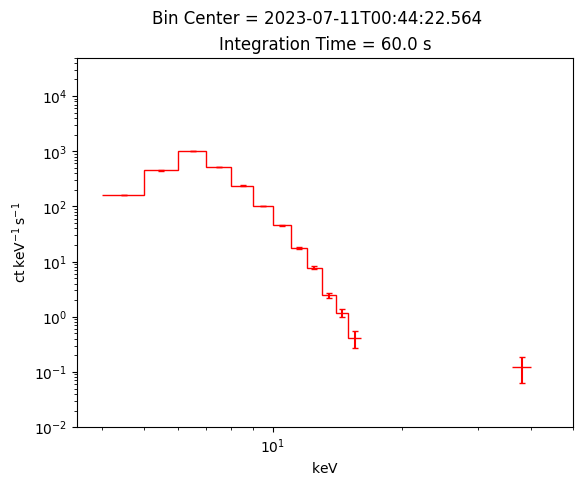

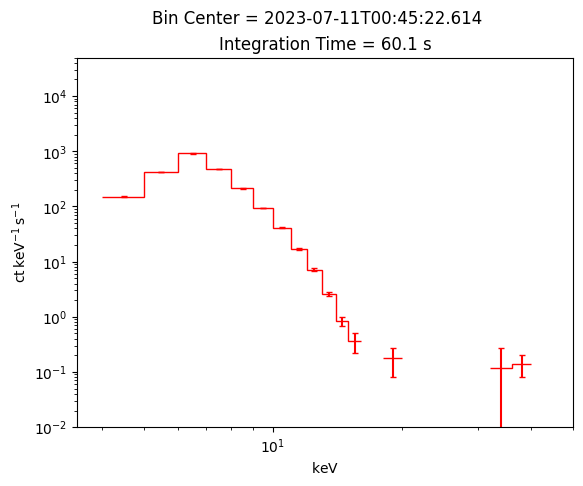

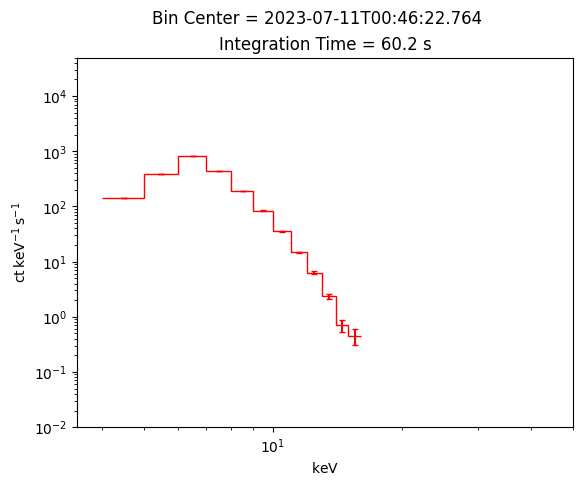

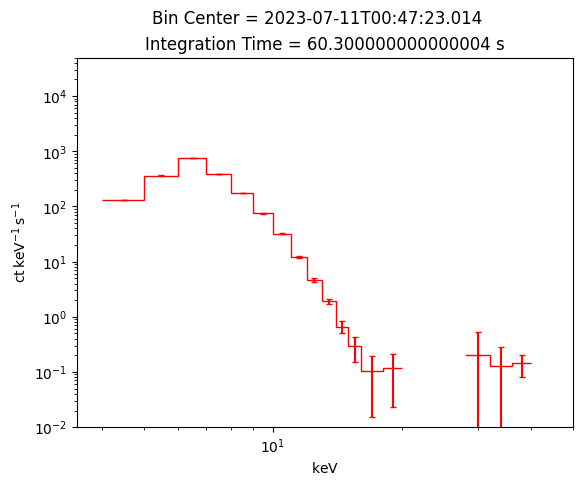

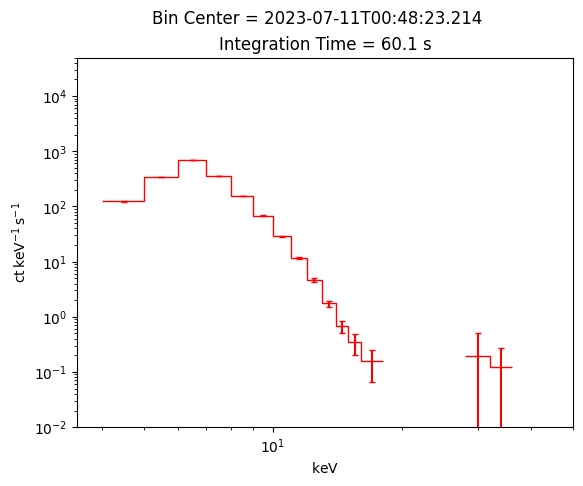

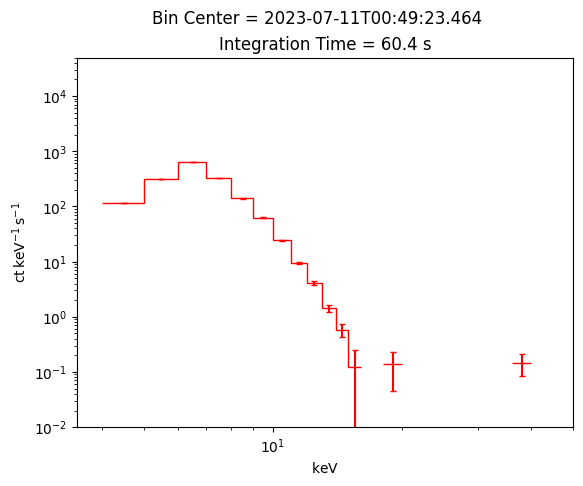

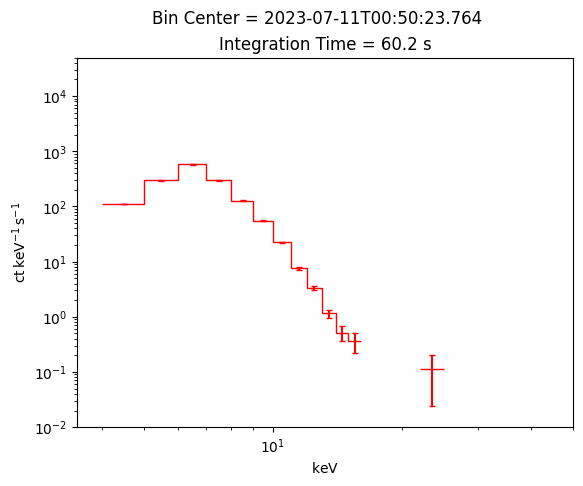

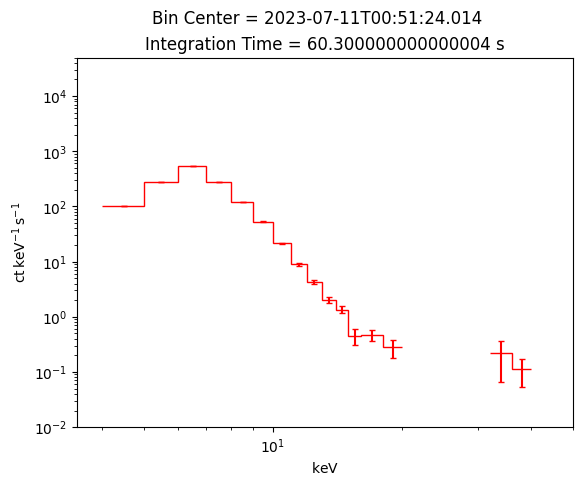

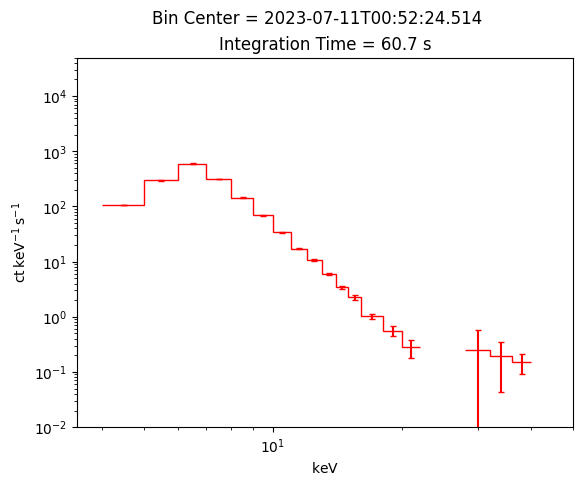

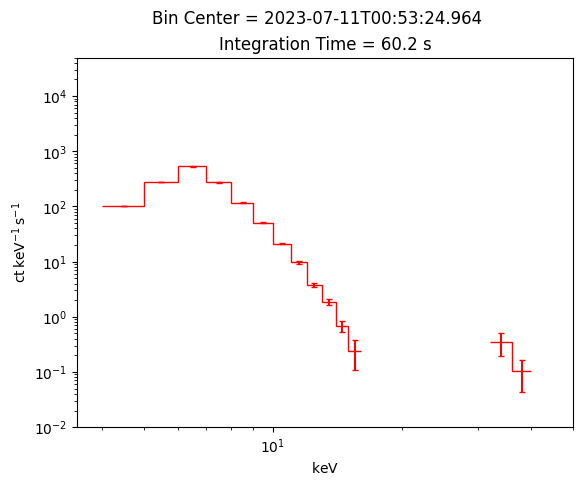

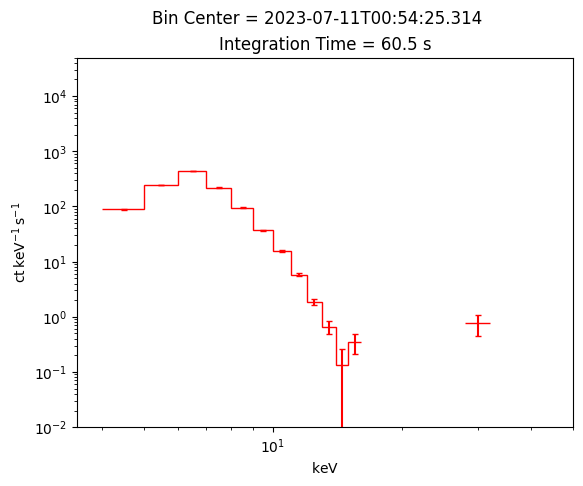

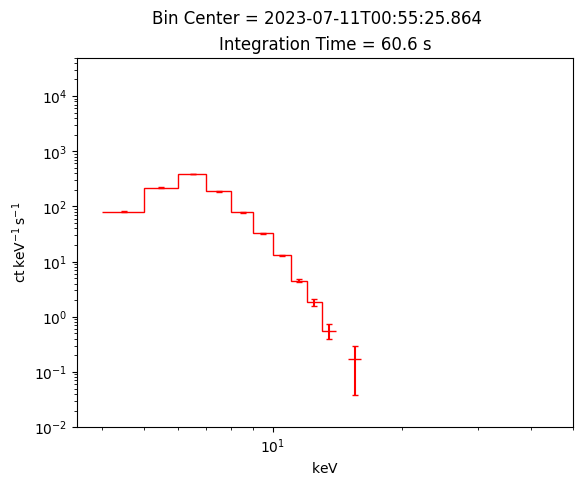

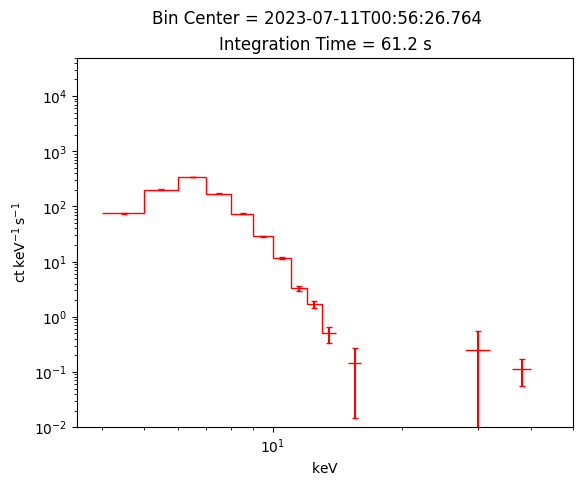

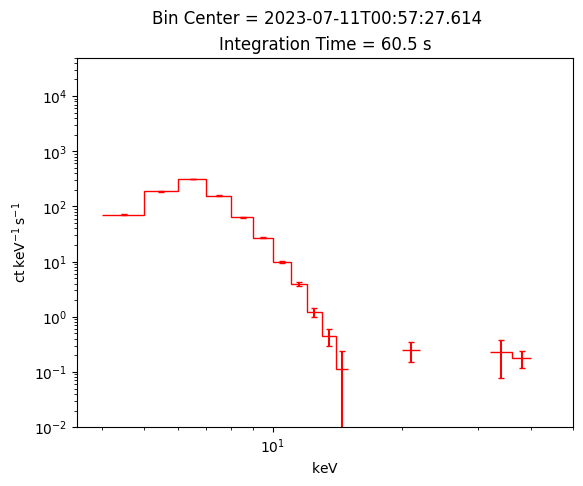

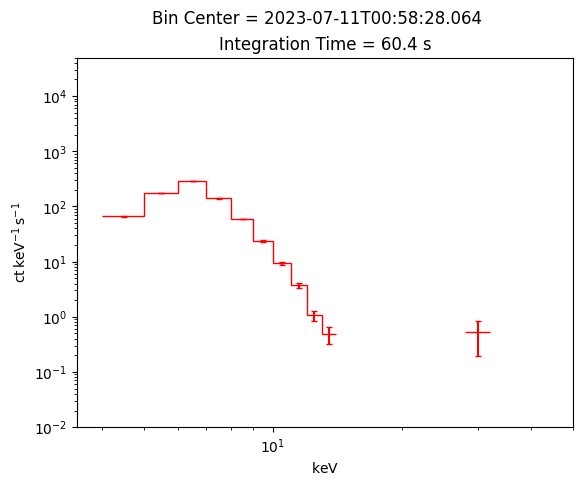

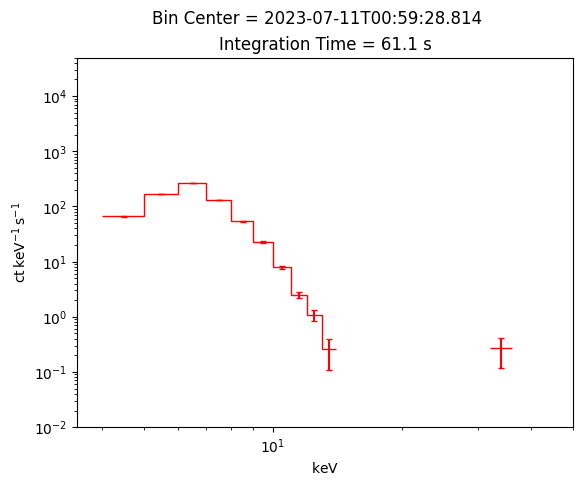

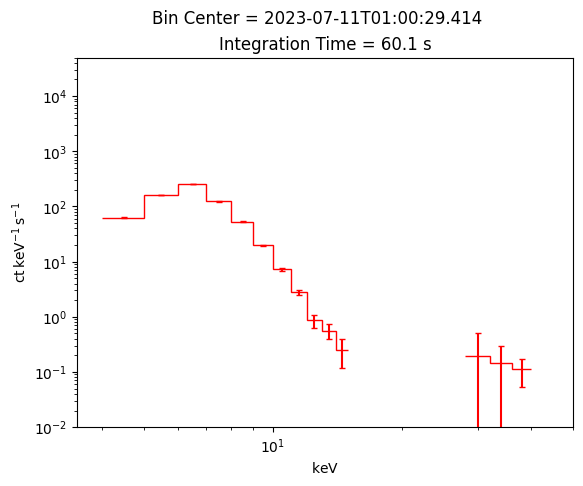

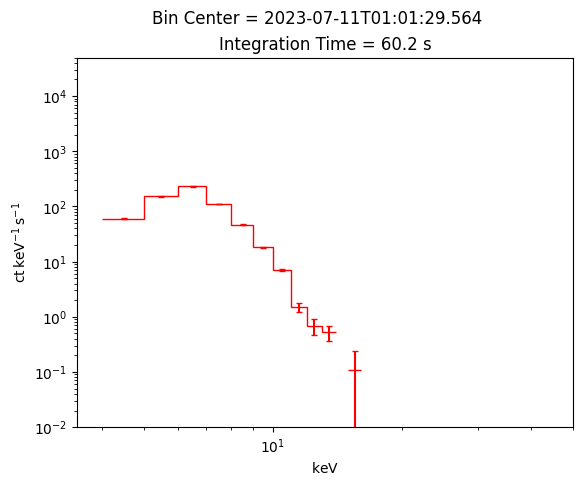

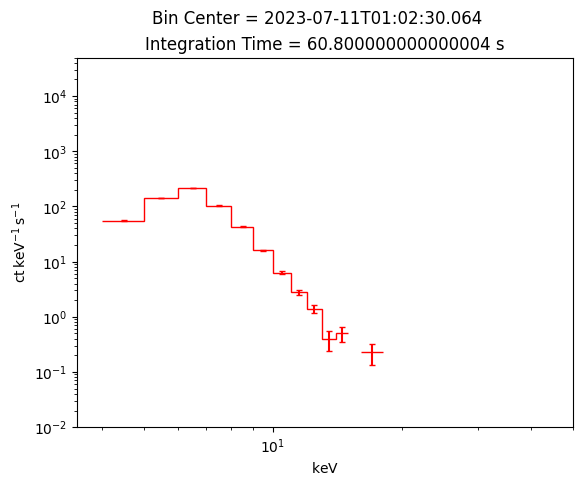

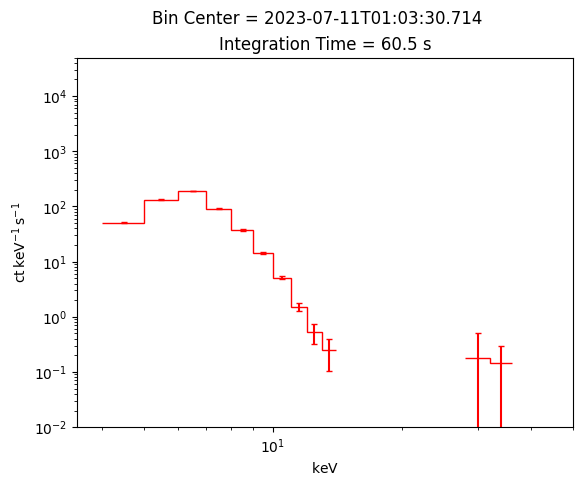

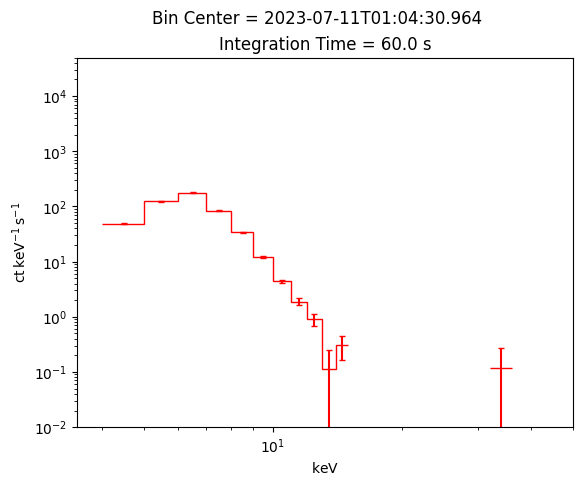

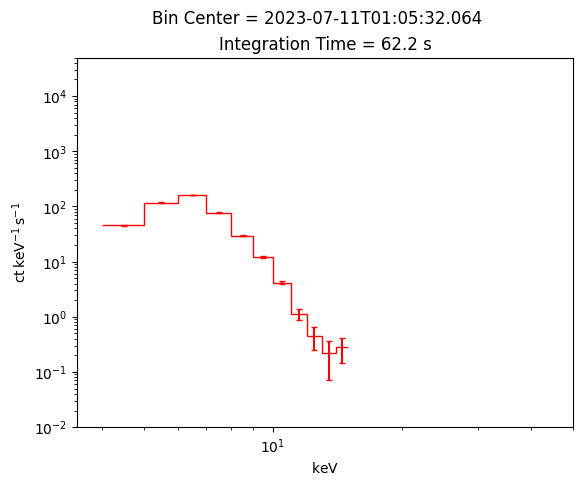

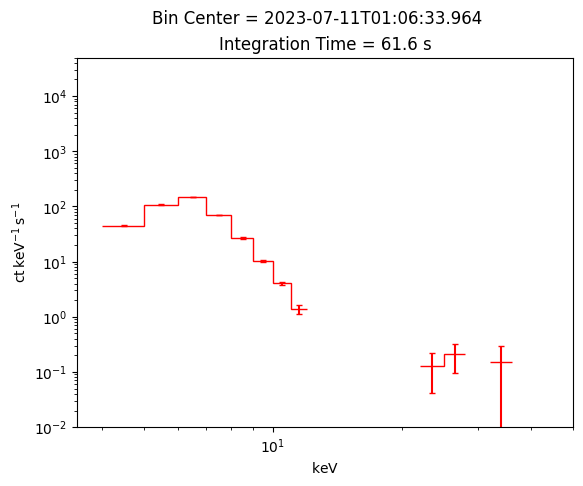

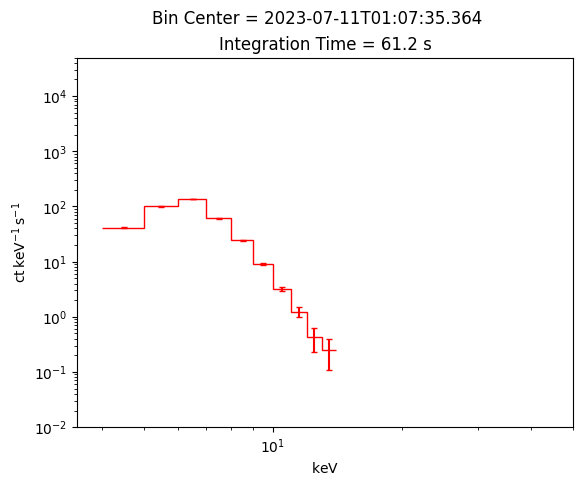

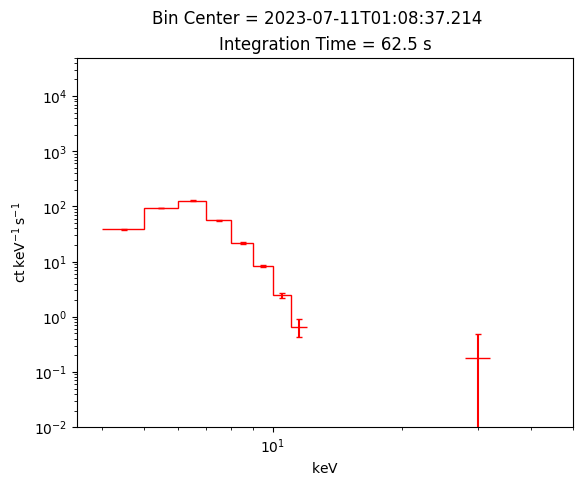

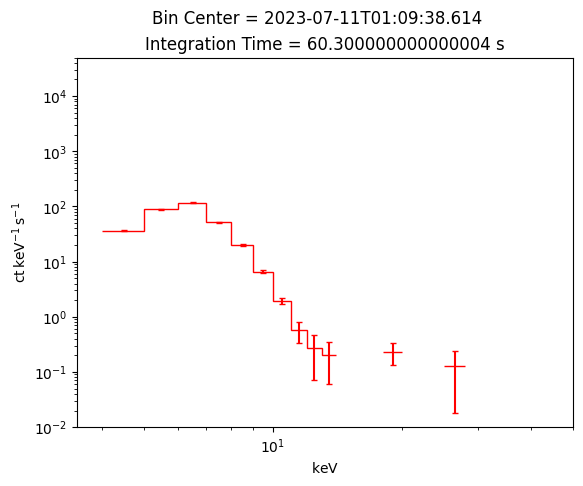

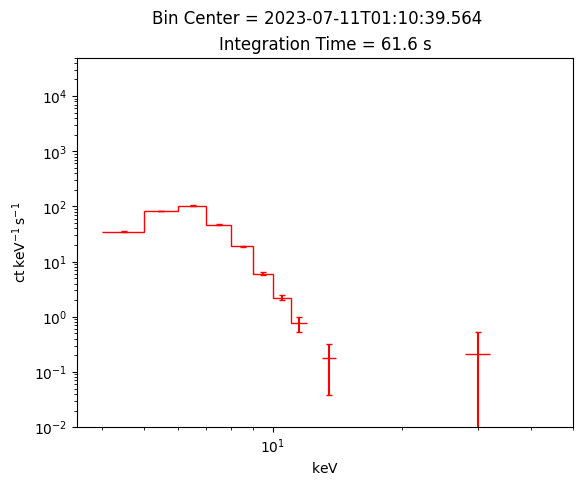

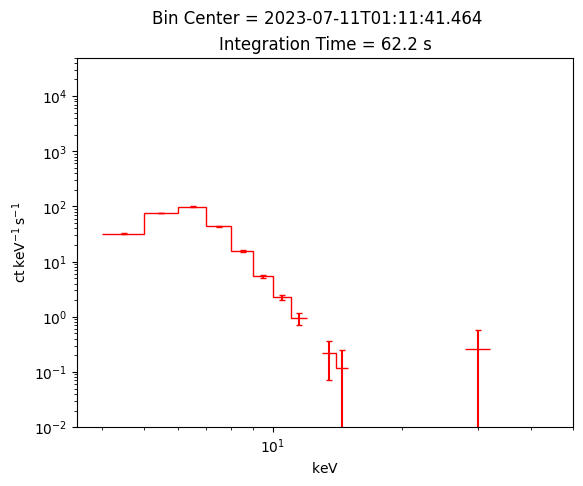

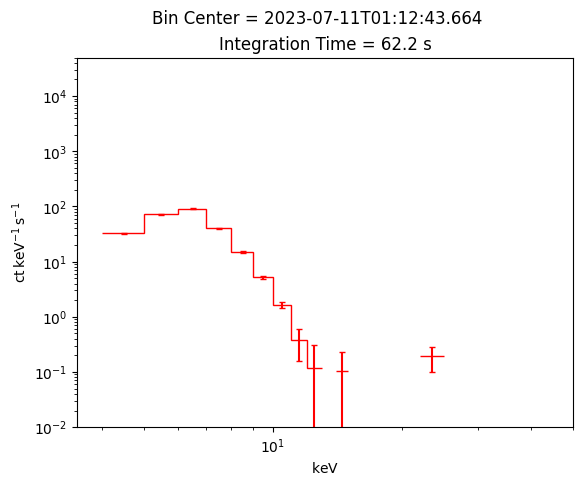

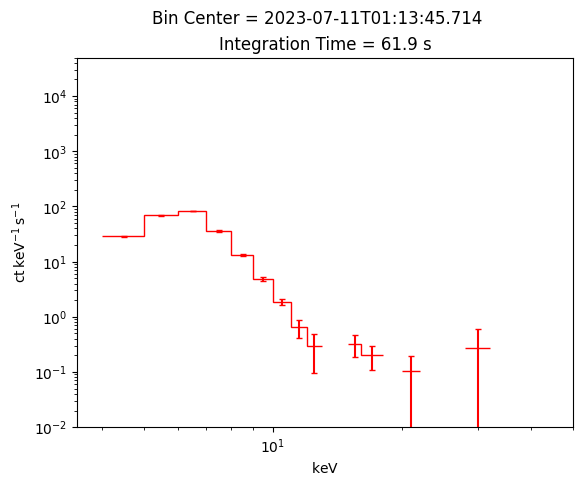

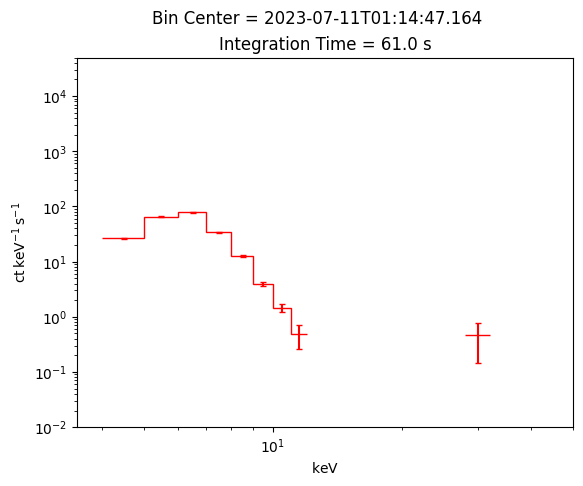

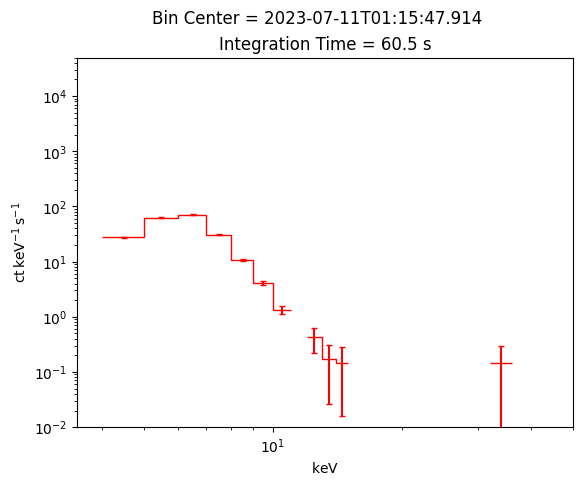

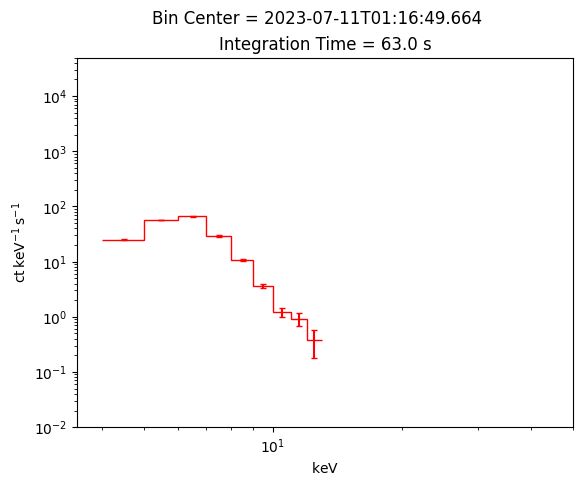

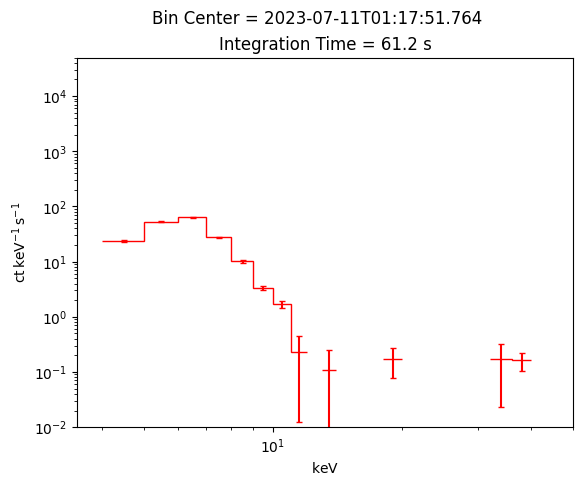

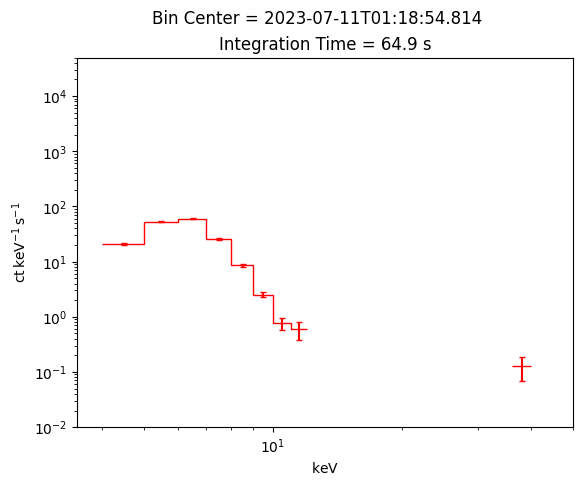

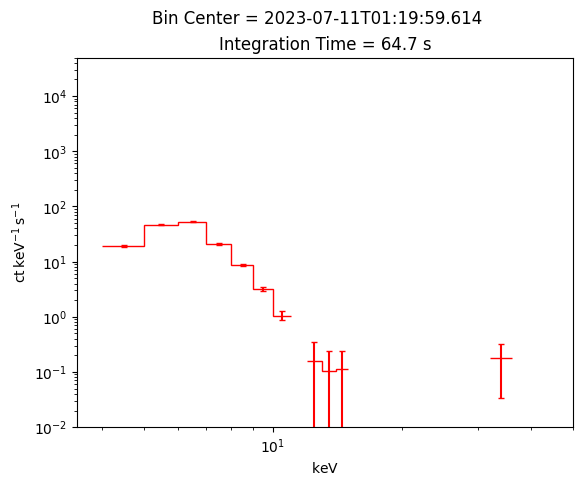

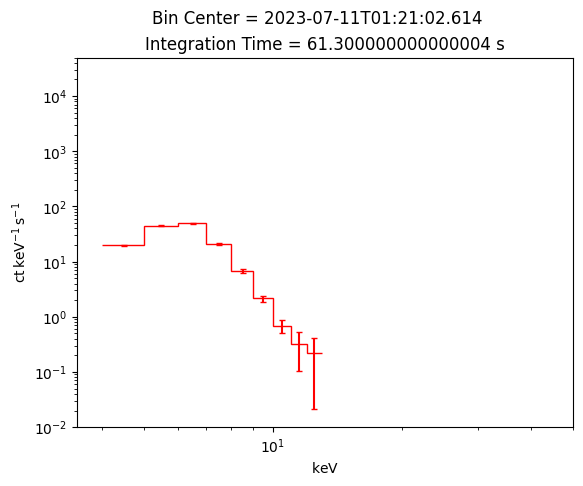

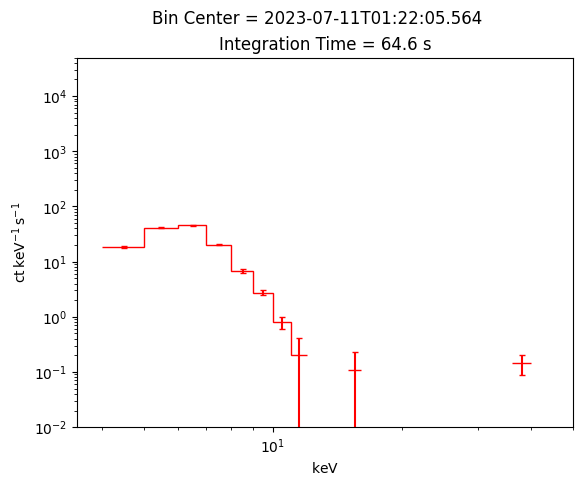

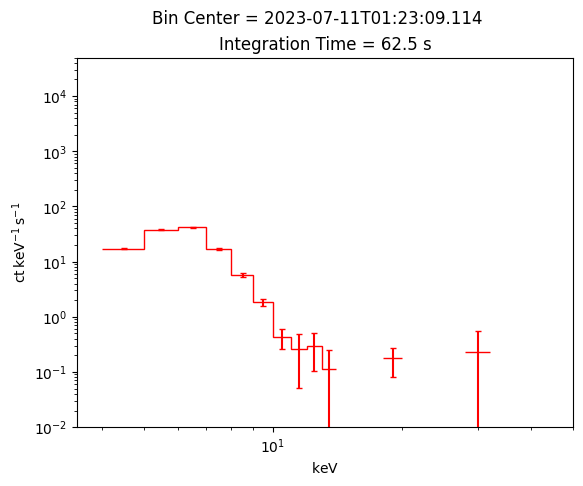

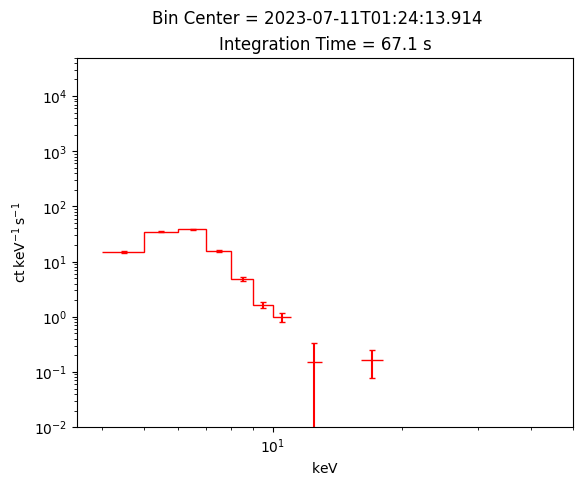

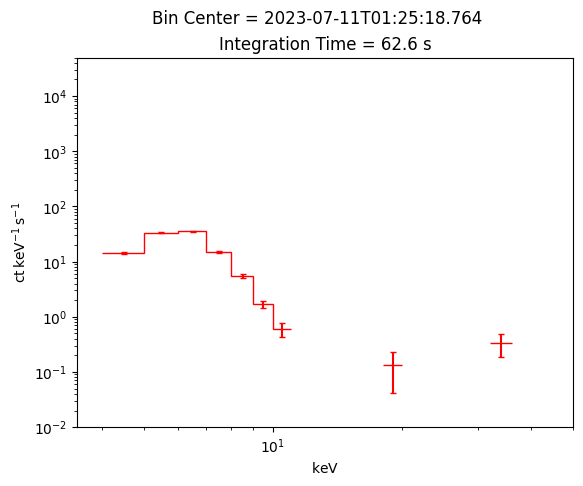

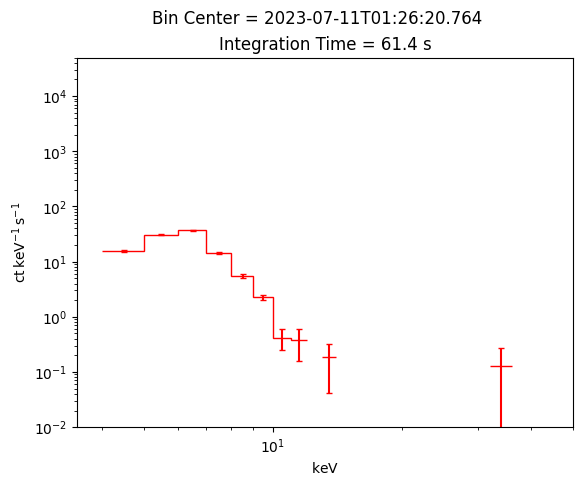

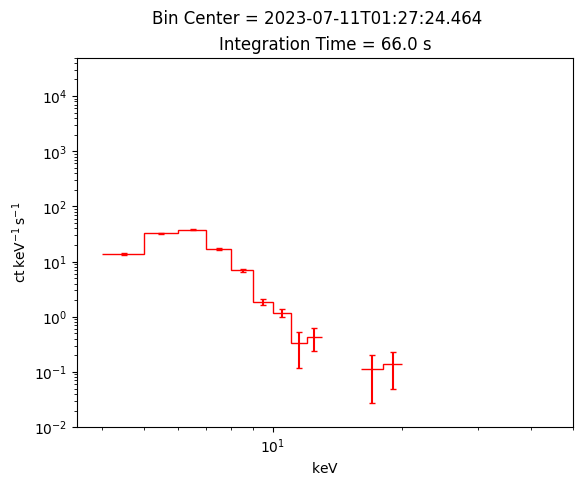

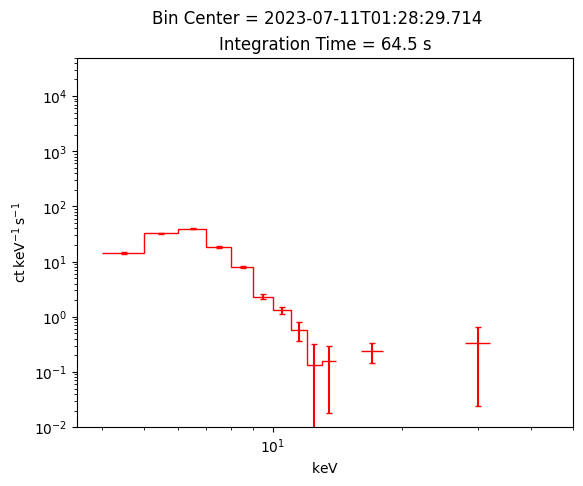

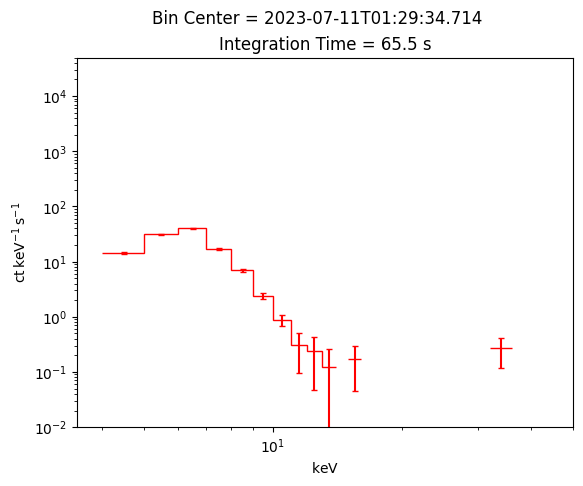

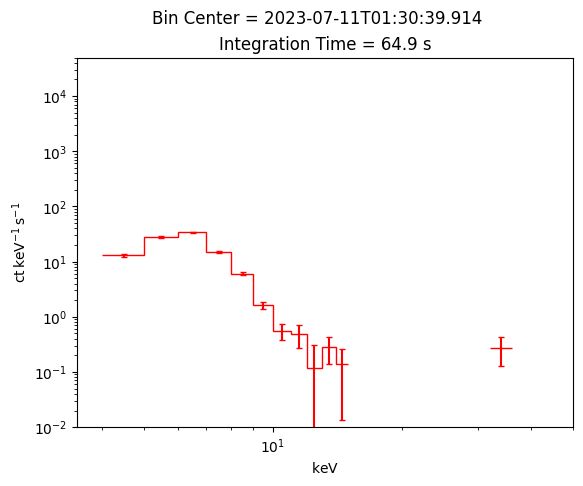

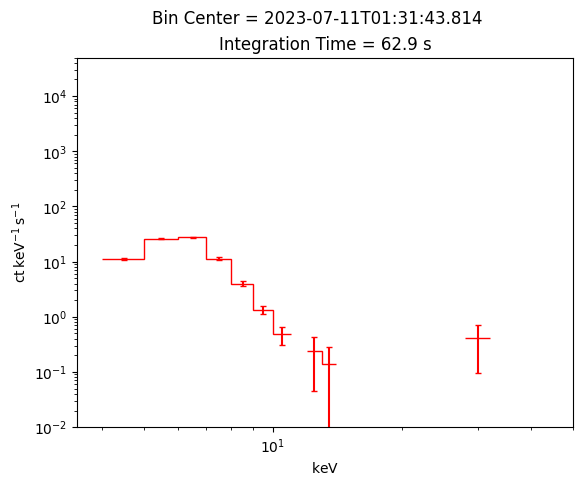

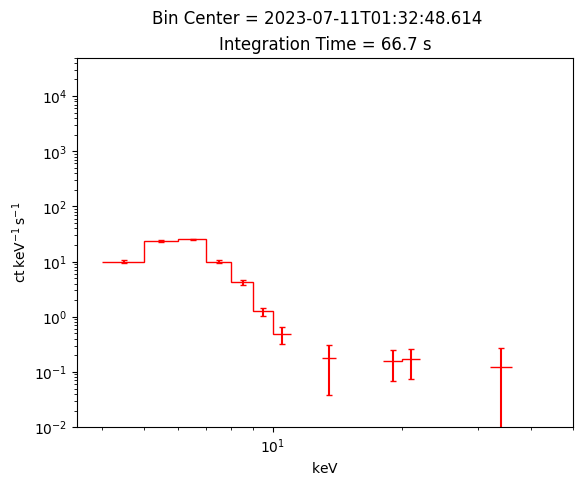

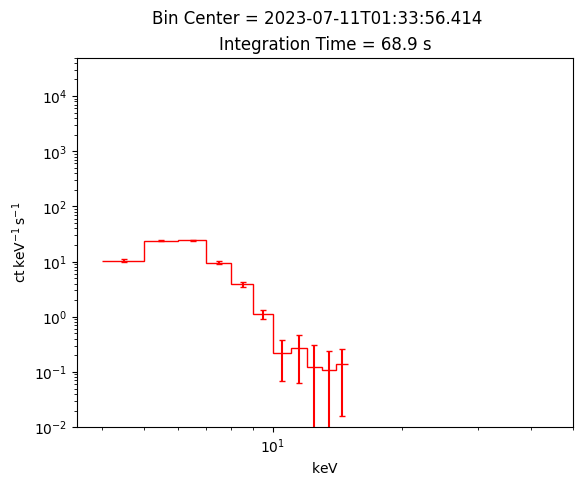

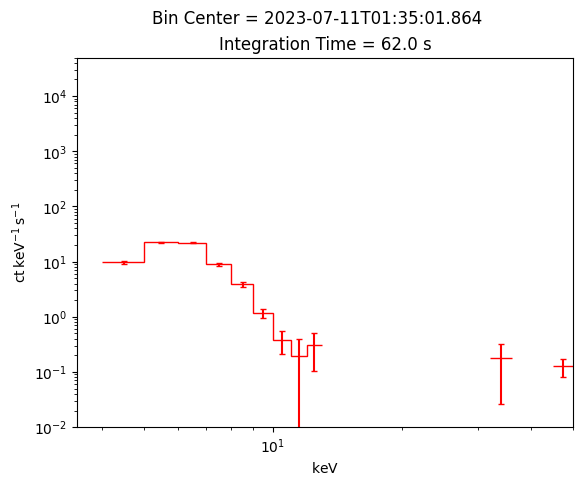

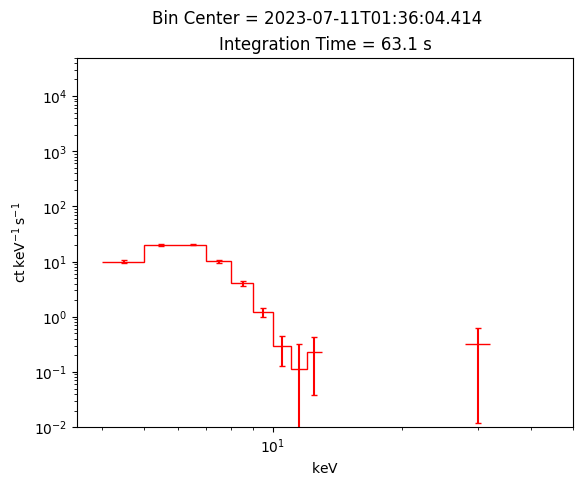

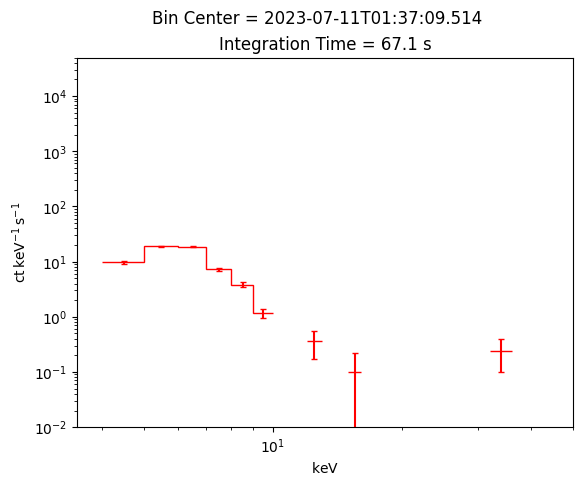

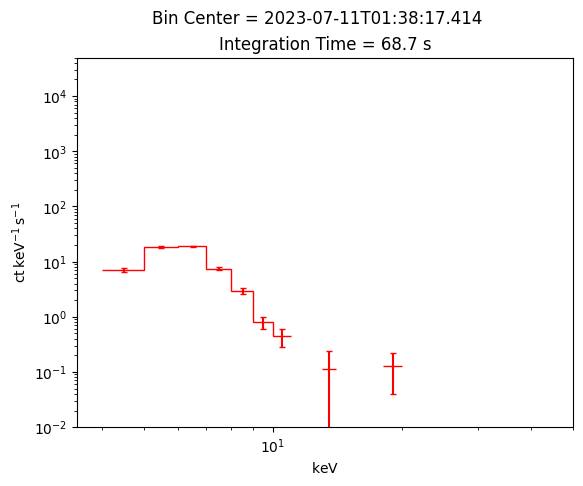

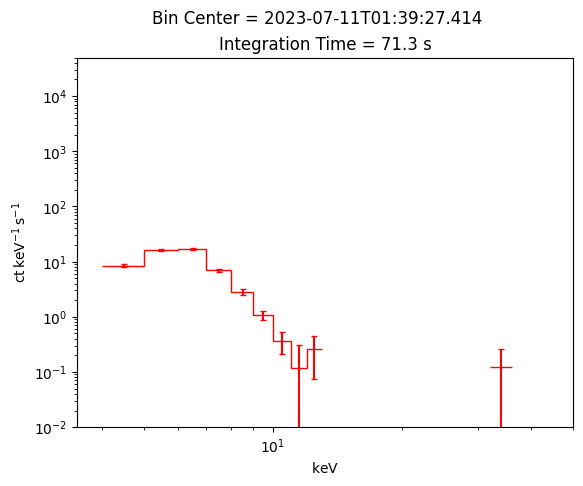

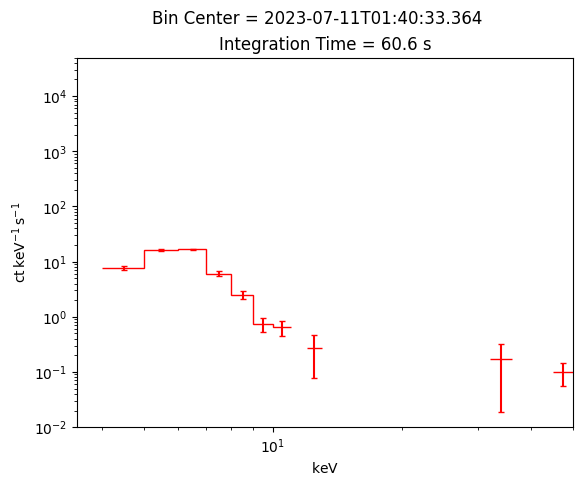

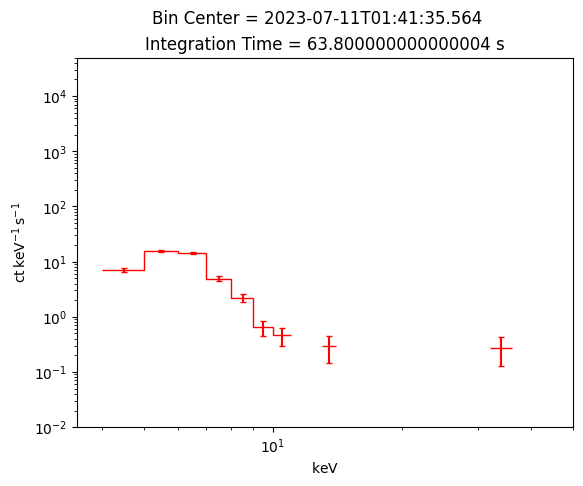

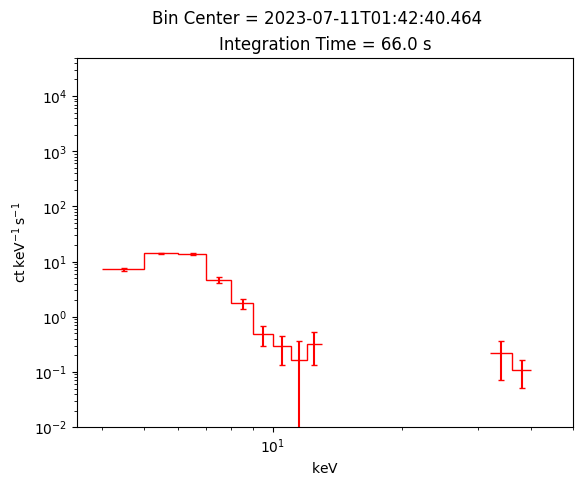

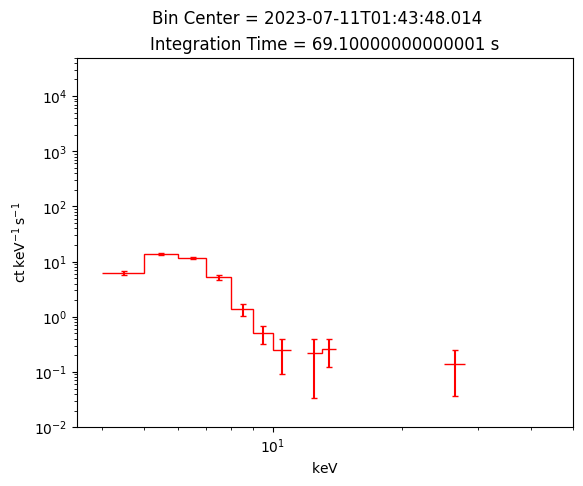

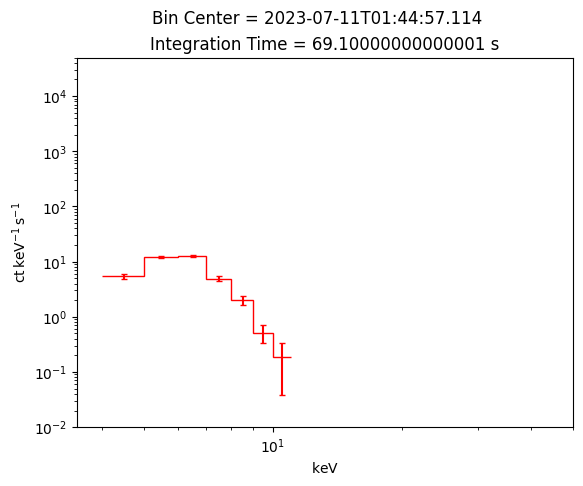

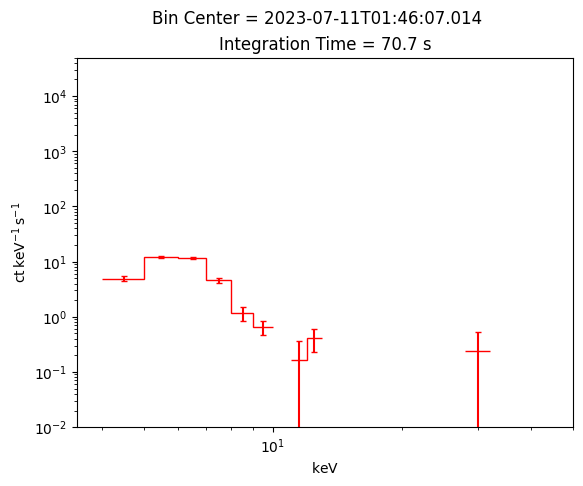

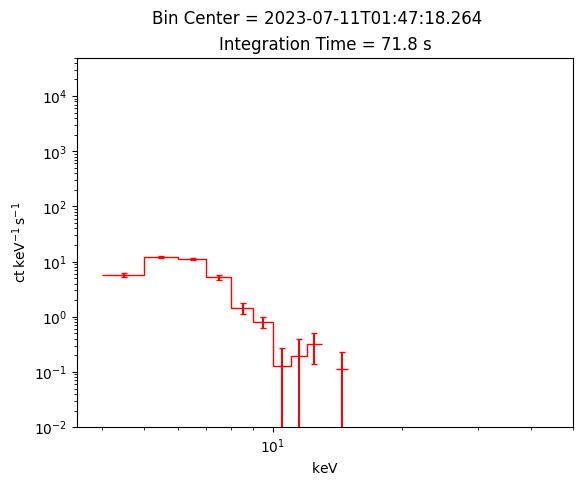

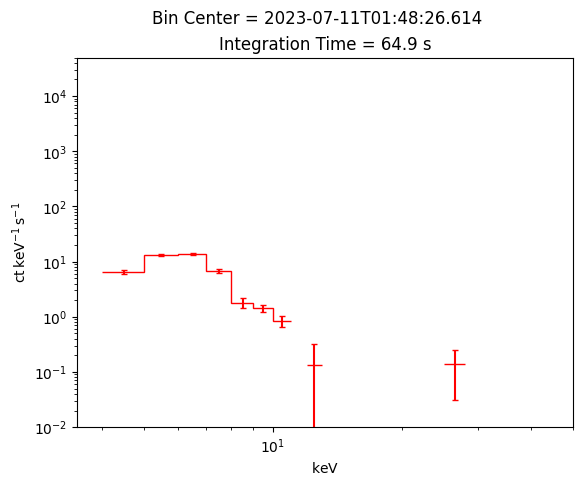

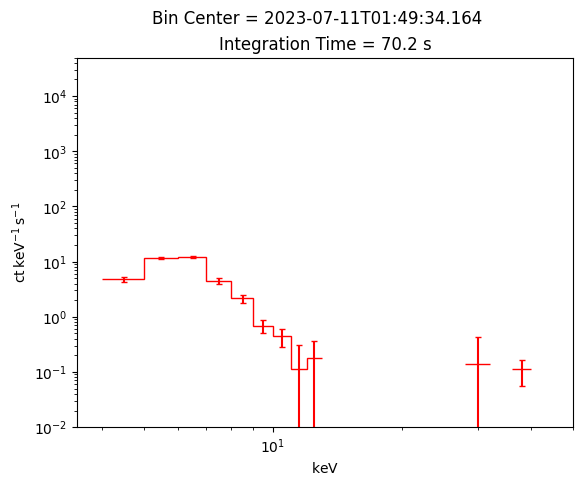

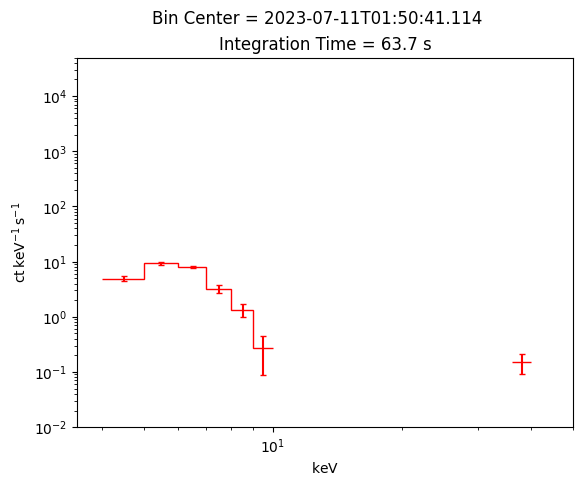

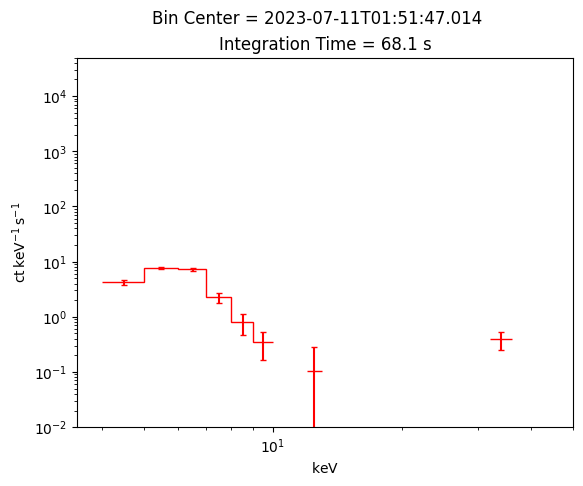

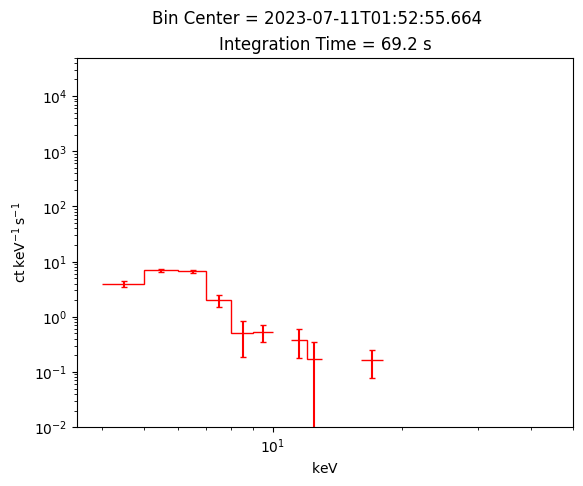

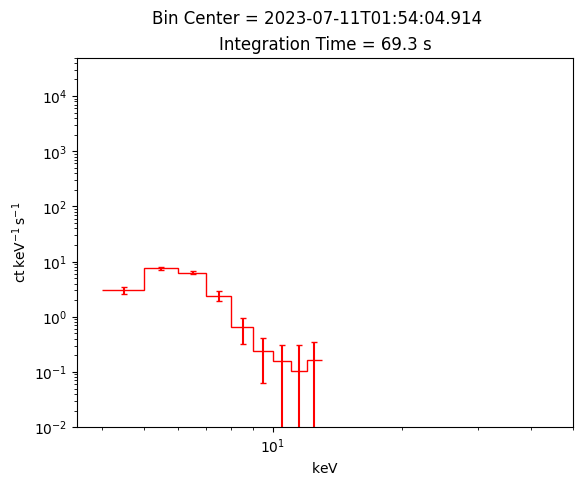

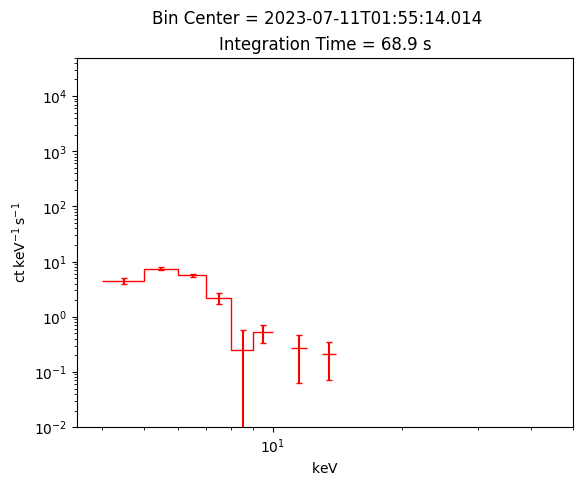

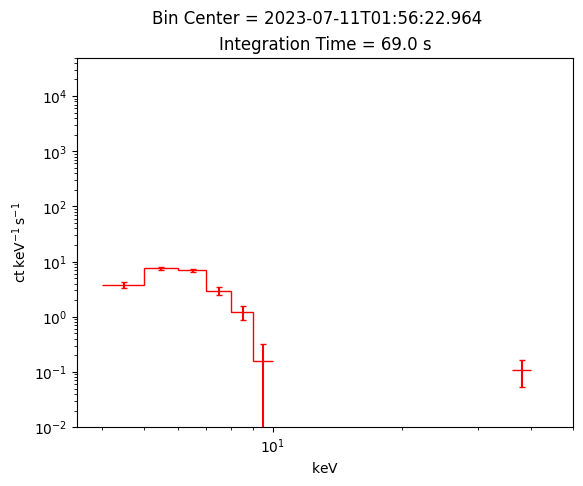

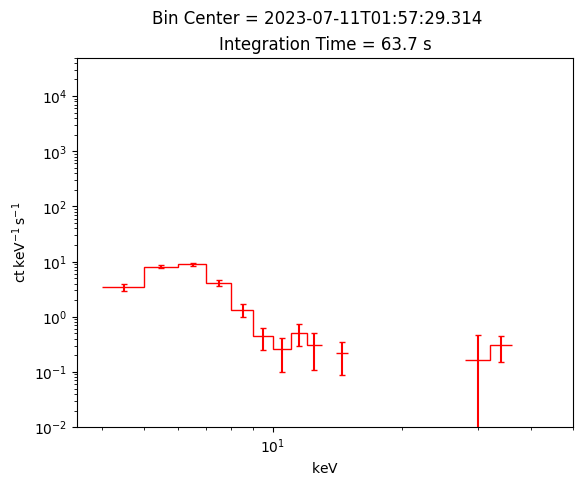

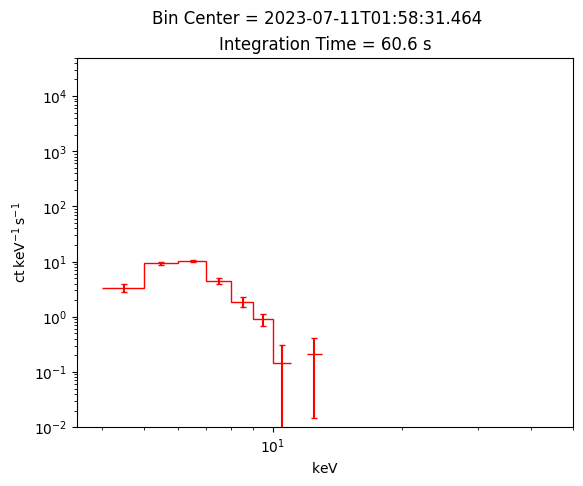

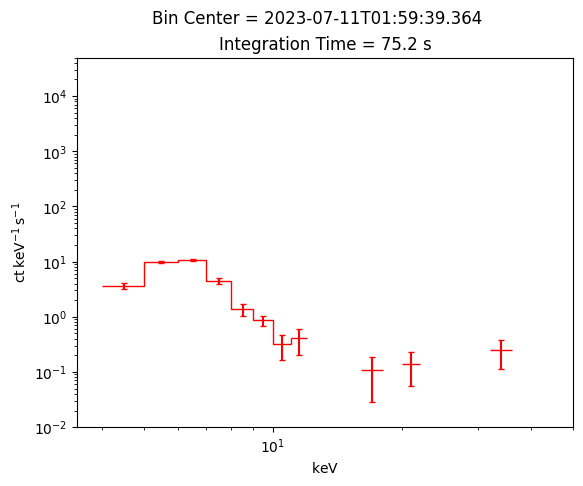

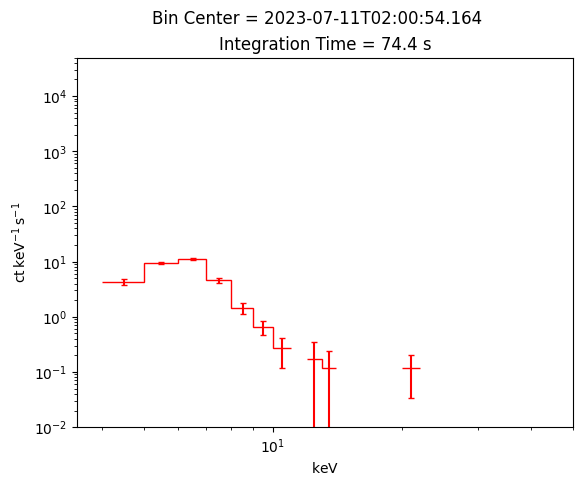

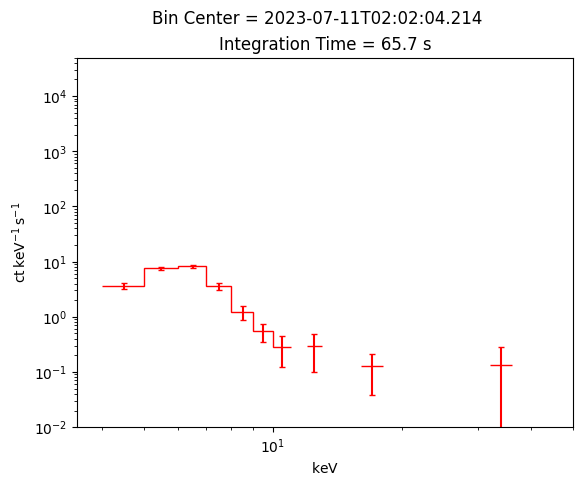

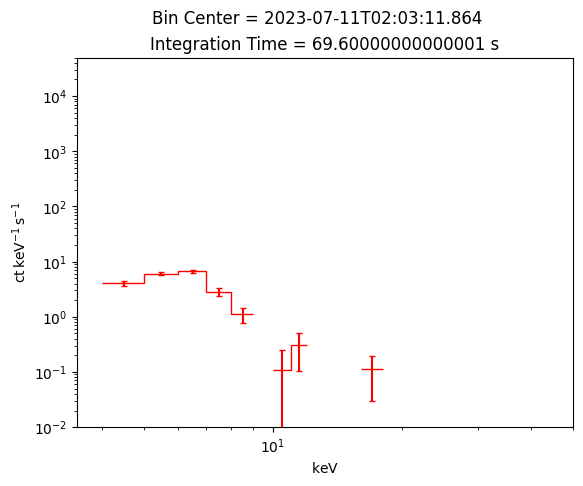

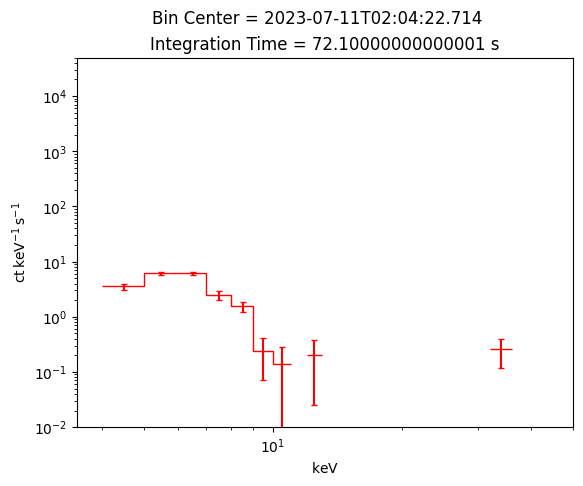

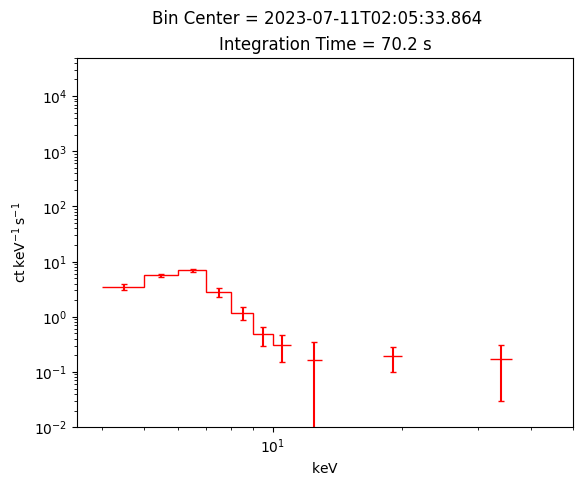

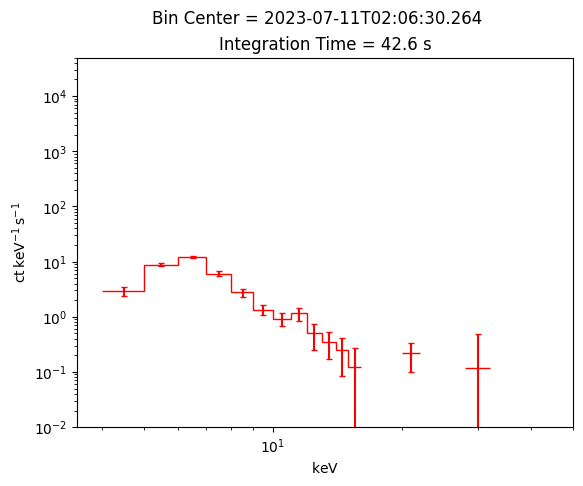

In [47]:
# Plot out a background subtracted spectrum for each time bin

for i in range(np.shape(counts_sci_bins)[0]):

    energy_edges = np.concatenate([energies_sci_bins['e_low'].value,[energies_sci_bins['e_high'][-1].value]])*u.keV
    energy_centers = energies_sci_bins['e_low'] + 0.5*np.diff(energy_edges)

    counts_sci = counts_sci_bins[i][0][0].to(u.ct / u.s / u.keV) 
    errors_sci = errors_sci_bins[i][0][0].to(u.ct / u.s / u.keV) 

    counts_bkg_subtracted = counts_sci - counts_bkg
    errors_bkg_subtracted = np.sqrt(errors_bkg**2 + errors_sci**2)

    # ignore any count rates below 0.1 cts / keV / s
    threshold = 0.1 * counts_sci.unit
    counts_bkg_subtracted_clean = [x.value if x >= threshold else np.nan for x in counts_bkg_subtracted ]* counts_sci.unit
    errors_bkg_subtracted_clean = [errors_bkg_subtracted[i].value if val >= threshold 
                                   else np.nan for i,val in enumerate(counts_bkg_subtracted) ]* counts_sci.unit

    # Create plot for each time bin 
    plt.figure()

    # set title as center of time bin
    plt.suptitle('Bin Center = '+str(times_sci_bins[i]))
    plt.title('Integration Time = '+str(deltatimes_sci_bins[i][0][0][0].to(u.s)))

    # plot data
    plt.errorbar(energy_centers,counts_bkg_subtracted_clean,yerr=errors_bkg_subtracted,
                 marker=None,capsize=2,linestyle='', color='red')
    plt.stairs(counts_bkg_subtracted_clean,energy_edges,baseline=None, color='red')

    # Set consistent axes limits so that we can easily see the evolution of the flare
    plt.xlim([3.5,50])
    plt.ylim([1e-2,5e4])

    # Set the axes scale to log log 
    plt.loglog()

    # Show the plots
    plt.show()